# Data Exploratory Analysis

In [1]:
import csv
from pandas import ExcelWriter
import datetime, warnings  
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import distplot
import sklearn as skl
import statistics
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import skew, kurtosis

from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy import stats
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
city = pd.read_csv('C:/Users/Playdata/py_projects/Mentoring/historical-hourly-weather-data/city_attributes.csv')
humidity = pd.read_csv('C:/Users/Playdata/py_projects/Mentoring/historical-hourly-weather-data/humidity.csv')
pressure = pd.read_csv('C:/Users/Playdata/py_projects/Mentoring/historical-hourly-weather-data/pressure.csv')
temp = pd.read_csv('C:/Users/Playdata/py_projects/Mentoring/historical-hourly-weather-data/temperature.csv')
weath_desc = pd.read_csv('C:/Users/Playdata/py_projects/Mentoring/historical-hourly-weather-data/weather_description.csv')
windir= pd.read_csv('C:/Users/Playdata/py_projects/Mentoring/historical-hourly-weather-data/wind_direction.csv')
windspd=pd.read_csv('C:/Users/Playdata/py_projects/Mentoring/historical-hourly-weather-data/wind_speed.csv')


In [83]:
add_weather = pd.read_csv('C:/Users/Playdata/py_projects/Mentoring/historical-hourly-weather-data/JFK_additional_weather.txt')

In [86]:
add_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183335 entries, 0 to 183334
Data columns (total 13 columns):
Site           183335 non-null object
Date           183335 non-null object
Hour           183335 non-null int64
Temperature    183335 non-null int64
Dewpoint       183335 non-null int64
RH             183335 non-null int64
WindDir        130752 non-null object
Windspeed      183335 non-null int64
CldFrac        183335 non-null float64
MSLP           130752 non-null float64
Weather        183335 non-null object
Precip         174360 non-null float64
Source         183335 non-null object
dtypes: float64(3), int64(5), object(5)
memory usage: 18.2+ MB


Site              Date  Hour  Temperature  Dewpoint  RH WindDir  Windspeed  \
0  KJFK  1/1/1998 0:00:00     1           17        -1  45     NaN         17   
1  KJFK  1/1/1998 0:00:00     2           16        -1  47     NaN         20   
2  KJFK  1/1/1998 0:00:00     3           15        -1  49     NaN         15   
3  KJFK  1/1/1998 0:00:00     4           16        -1  47     NaN         15   
4  KJFK  1/1/1998 0:00:00     5           15         0  51     NaN         20   
5  KJFK  1/1/1998 0:00:00     6           15         1  53     NaN         16   
6  KJFK  1/1/1998 0:00:00     7           15         2  56     NaN         13   
7  KJFK  1/1/1998 0:00:00     8           16         2  54     NaN         10   
8  KJFK  1/1/1998 0:00:00     9           18         2  49     NaN         12   
9  KJFK  1/1/1998 0:00:00    10           20         3  48     NaN         12   

   CldFrac  MSLP Weather  Precip Source  
0      0.1   NaN     FEW     NaN   NCDC  
1      0.0   NaN     CLR     NaN   NCDC  
2      0.0   NaN     CLR     NaN   NCDC  
3      0.1   NaN     FEW     NaN   NCDC  
4      0.0   NaN     CLR     NaN   NCDC  
5      0.0   NaN     CLR     NaN   NCDC  
6      0.1   NaN     FEW     NaN   NCDC  
7      0.4   NaN     SCT     NaN   NCDC  
8      0.4   NaN     SCT     NaN   NCDC  
9      0.4   NaN     SCT     NaN   NCDC

# Basic Data Exploration

In [3]:
file_list = [city, humidity, pressure, temp, weath_desc, windir, windspd]

for file in file_list:

    tab_info = pd.DataFrame(file.dtypes).T.rename(index={0:'column type'})
    tab_info = tab_info.append(pd.DataFrame(file.isnull().sum()).T.rename(index={0:'null values(nb)'}))
    tab_info=tab_info.append(pd.DataFrame(file.isnull().sum()/file.shape[0]*100).T.rename(index={0:'null values(%)'}))
    tab_info

City Country Latitude Longitude
column type      object  object  float64   float64
null values(nb)       0       0        0         0
null values(%)        0       0        0         0

datetime Vancouver  Portland San Francisco   Seattle  \
column type       object   float64   float64       float64   float64   
null values(nb)        0      1826       449           942       289   
null values(%)         0   4.03509  0.992199       2.08163  0.638632   

                Los Angeles San Diego Las Vegas  Phoenix Albuquerque  \
column type         float64   float64   float64  float64     float64   
null values(nb)         152       344       842     1308         710   
null values(%)     0.335889  0.760171   1.86065  2.89042     1.56896   

                   ...    Philadelphia New York Montreal    Boston Beersheba  \
column type        ...         float64  float64  float64   float64   float64   
null values(nb)    ...             624     1624     1696       449       859   
null values(%)     ...         1.37891  3.58871  3.74782  0.992199   1.89822   

                Tel Aviv District    Eilat    Haifa Nahariyya Jerusalem  
column type               float64  float64  float64   float64   float64  
null values(nb)              1113      970      818       817       906  
null values(%)            2.45951   2.1435  1.80761   1.80541   2.00208  

[3 rows x 37 columns]

datetime Vancouver    Portland San Francisco    Seattle  \
column type       object   float64     float64       float64    float64   
null values(nb)        0      4234           4           815         13   
null values(%)         0   9.35629  0.00883919       1.80099  0.0287274   

                Los Angeles San Diego Las Vegas  Phoenix Albuquerque  \
column type         float64   float64   float64  float64     float64   
null values(nb)         252       175        88      594         456   
null values(%)     0.556869  0.386715  0.194462  1.31262     1.00767   

                   ...    Philadelphia New York Montreal     Boston Beersheba  \
column type        ...         float64  float64  float64    float64   float64   
null values(nb)    ...               4     1041      994          7       806   
null values(%)     ...      0.00883919   2.3004  2.19654  0.0154686    1.7811   

                Tel Aviv District    Eilat    Haifa Nahariyya Jerusalem  
column type               float64  float64  float64   float64   float64  
null values(nb)               930      792      798       795       799  
null values(%)            2.05511  1.75016  1.76342   1.75679   1.76563  

[3 rows x 37 columns]

datetime Vancouver   Portland San Francisco     Seattle  \
column type       object   float64    float64       float64     float64   
null values(nb)        0       795          1           793           3   
null values(%)         0   1.75679  0.0022098       1.75237  0.00662939   

                Los Angeles  San Diego  Las Vegas     Phoenix Albuquerque  \
column type         float64    float64    float64     float64     float64   
null values(nb)           3          1          1           3           1   
null values(%)   0.00662939  0.0022098  0.0022098  0.00662939   0.0022098   

                   ...    Philadelphia New York    Montreal      Boston  \
column type        ...         float64  float64     float64     float64   
null values(nb)    ...               3      793           3           3   
null values(%)     ...      0.00662939  1.75237  0.00662939  0.00662939   

                Beersheba Tel Aviv District    Eilat    Haifa Nahariyya  \
column type       float64           float64  float64  float64   float64   
null values(nb)       798               793      792      798       797   
null values(%)    1.76342           1.75237  1.75016  1.76342   1.76121   

                Jerusalem  
column type       float64  
null values(nb)       793  
null values(%)    1.75237  

[3 rows x 37 columns]

datetime Vancouver   Portland San Francisco    Seattle  \
column type       object    object     object        object     object   
null values(nb)        0       793          1           793          1   
null values(%)         0   1.75237  0.0022098       1.75237  0.0022098   

                Los Angeles  San Diego  Las Vegas    Phoenix Albuquerque  \
column type          object     object     object     object      object   
null values(nb)           1          1          1          1           1   
null values(%)    0.0022098  0.0022098  0.0022098  0.0022098   0.0022098   

                   ...    Philadelphia New York   Montreal     Boston  \
column type        ...          object   object     object     object   
null values(nb)    ...               1      793          1          1   
null values(%)     ...       0.0022098  1.75237  0.0022098  0.0022098   

                Beersheba Tel Aviv District    Eilat    Haifa Nahariyya  \
column type        object            object   object   object    object   
null values(nb)       793               793      792      793       793   
null values(%)    1.75237           1.75237  1.75016  1.75237   1.75237   

                Jerusalem  
column type        object  
null values(nb)       793  
null values(%)    1.75237  

[3 rows x 37 columns]

datetime Vancouver   Portland San Francisco    Seattle  \
column type       object   float64    float64       float64    float64   
null values(nb)        0       795          1           794          1   
null values(%)         0   1.75679  0.0022098       1.75458  0.0022098   

                Los Angeles  San Diego Las Vegas    Phoenix Albuquerque  \
column type         float64    float64   float64    float64     float64   
null values(nb)           1          1         5          1           1   
null values(%)    0.0022098  0.0022098  0.011049  0.0022098   0.0022098   

                   ...    Philadelphia New York   Montreal     Boston  \
column type        ...         float64  float64    float64    float64   
null values(nb)    ...               1      793          1          1   
null values(%)     ...       0.0022098  1.75237  0.0022098  0.0022098   

                Beersheba Tel Aviv District    Eilat    Haifa Nahariyya  \
column type       float64           float64  float64  float64   float64   
null values(nb)       793               793      797      793       793   
null values(%)    1.75237           1.75237  1.76121  1.75237   1.75237   

                Jerusalem  
column type       float64  
null values(nb)       793  
null values(%)    1.75237  

[3 rows x 37 columns]

datetime Vancouver   Portland San Francisco    Seattle  \
column type       object   float64    float64       float64    float64   
null values(nb)        0       795          1           794          1   
null values(%)         0   1.75679  0.0022098       1.75458  0.0022098   

                Los Angeles  San Diego Las Vegas    Phoenix Albuquerque  \
column type         float64    float64   float64    float64     float64   
null values(nb)           1          1        15          2           4   
null values(%)    0.0022098  0.0022098  0.033147  0.0044196  0.00883919   

                   ...    Philadelphia New York   Montreal     Boston  \
column type        ...         float64  float64    float64    float64   
null values(nb)    ...               2      793          1          1   
null values(%)     ...       0.0044196  1.75237  0.0022098  0.0022098   

                Beersheba Tel Aviv District    Eilat    Haifa Nahariyya  \
column type       float64           float64  float64  float64   float64   
null values(nb)       793               794      792      795       794   
null values(%)    1.75237           1.75458  1.75016  1.75679   1.75458   

                Jerusalem  
column type       float64  
null values(nb)       794  
null values(%)    1.75458  

[3 rows x 37 columns]

# Cleansing 

##  Weather.CSV

### Location(NY), YEAR(2015)

In [4]:
city_ny = city[city['City']=='New York']
humidity_ny = humidity[['datetime','New York']]
pressure_ny = pressure[['datetime','New York']]
temp_ny = temp[['datetime','New York']]
weath_desc_ny = weath_desc[['datetime','New York']]
windir_ny = windir[['datetime','New York']]
windspd_ny = windspd[['datetime','New York']]

In [5]:
def setyear(dataset):
    dataset = dataset[dataset['datetime'] >= '2014-12-31 22:00:00']
    dataset = dataset[dataset['datetime'] < '2016-01-01 02:00:00']
    #dataset = dataset
    return dataset

In [6]:
datecolumn = humidity_ny[humidity_ny['datetime'] >= '2014-12-31 22:00:00']
datecolumn = datecolumn[humidity_ny['datetime'] < '2016-01-01 02:00:00']
datecolumn.drop('New York', axis = 1, inplace = True)
datecolumn.shape
datecolumn[:5]
datecolumn.tail()

C:\Users\Playdata\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(8764, 1)

datetime
19714  2014-12-31 22:00:00
19715  2014-12-31 23:00:00
19716  2015-01-01 00:00:00
19717  2015-01-01 01:00:00
19718  2015-01-01 02:00:00

datetime
28473  2015-12-31 21:00:00
28474  2015-12-31 22:00:00
28475  2015-12-31 23:00:00
28476  2016-01-01 00:00:00
28477  2016-01-01 01:00:00

In [7]:
# changing data columns' name to each features, not location name
humidity_ny_date = setyear(humidity_ny)
humidity_ny_date_ren = humidity_ny_date.rename(columns = {'New York' : 'humidity'})

pressure_ny_date = setyear(pressure_ny)
pressure_ny_date_ren = pressure_ny_date.rename(columns = {'New York' : 'pressure'})

temp_ny_date = setyear(temp_ny)
temp_ny_date_ren = temp_ny_date.rename(columns = {'New York' : 'temperature'})

weath_desc_ny_date = setyear(weath_desc_ny)
weath_desc_ny_date_ren = weath_desc_ny_date.rename(columns = {'New York' : 'weather description'})

windir_ny_date = setyear(windir_ny)
windir_ny_date_ren = windir_ny_date.rename(columns = {'New York' : 'wind direction'})

windspd_ny_date = setyear(windspd_ny)
windspd_ny_date_ren = windspd_ny_date.rename(columns ={'New York' : 'wind speed'})

In [8]:
weather = pd.DataFrame(columns = ['datetime', 'humidity', 'pressure', 'temperature', 'weather description', 'wind direction', 'wind speed'])
# , pressure_ny_date_ren, temp_ny_date_ren, weath_desc_ny_date_ren, windir_ny_date_ren, windspd_ny_date_ren)

In [9]:
weather

Empty DataFrame
Columns: [datetime, humidity, pressure, temperature, weather description, wind direction, wind speed]
Index: []

In [10]:
file_list_date = [city, humidity_ny_date, pressure_ny_date, temp_ny_date, weath_desc_ny_date, windir_ny_date, windspd_ny_date]
file_list_date_ren = [datecolumn['datetime'], humidity_ny_date_ren['humidity'], pressure_ny_date_ren['pressure'], temp_ny_date_ren['temperature'], weath_desc_ny_date_ren['weather description'], windir_ny_date_ren['wind direction'], windspd_ny_date_ren['wind speed']]
# for file in file_list_date_ren:
#     pd.concat()
# weather
weather = pd.concat(file_list_date_ren, axis = 1)
# # series로 변형
weather.to_csv('weather_transed.csv', sep='\t')

#파일 읽으려면 밑의 명령어와 같이 읽으면 됨.
# pd.read_csv('weather_transed.csv',sep='\t')


In [11]:
weather[:5]
weather.tail()

datetime  humidity  pressure  temperature  \
19714  2014-12-31 22:00:00      59.0    1022.0   268.050000   
19715  2014-12-31 23:00:00      69.0    1026.0   268.633089   
19716  2015-01-01 00:00:00      59.0    1022.0   268.050000   
19717  2015-01-01 01:00:00      59.0    1022.0   268.050000   
19718  2015-01-01 02:00:00      58.0    1021.0   267.186000   

      weather description  wind direction  wind speed  
19714        sky is clear           249.0         2.0  
19715        sky is clear           250.0         3.0  
19716        sky is clear           249.0         2.0  
19717        sky is clear           249.0         2.0  
19718        sky is clear           246.0         2.0

datetime  humidity  pressure  temperature  \
28473  2015-12-31 21:00:00      64.0    1017.0   281.026831   
28474  2015-12-31 22:00:00      61.0    1018.0   280.360000   
28475  2015-12-31 23:00:00      73.0    1022.0   279.393851   
28476  2016-01-01 00:00:00      65.0    1019.0   279.540000   
28477  2016-01-01 01:00:00      73.0    1019.0   279.418535   

      weather description  wind direction  wind speed  
28473     overcast clouds           307.0         5.0  
28474     overcast clouds           300.0         5.0  
28475       moderate rain           299.0         4.0  
28476       broken clouds           270.0         3.0  
28477       broken clouds           270.0         3.0

In [12]:
weather.shape
weather.info()


(8764, 7)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8764 entries, 19714 to 28477
Data columns (total 7 columns):
datetime               8764 non-null object
humidity               8764 non-null float64
pressure               8764 non-null float64
temperature            8764 non-null float64
weather description    8764 non-null object
wind direction         8764 non-null float64
wind speed             8764 non-null float64
dtypes: float64(5), object(2)
memory usage: 547.8+ KB


### Flight.csv

In [13]:
df = pd.read_csv('C:/Users/Playdata/py_projects/Mentoring/input/flights.csv', low_memory=False)
print('Dataframe dimensions=', df.shape)

Dataframe dimensions= (5819079, 31)


In [14]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [15]:
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH','DAY']])
df_2015_dep = df[df['ORIGIN_AIRPORT'] == "JFK"]
df_2015_arr = df[df['DESTINATION_AIRPORT'] =="JFK"]
df_2015 = df_2015_dep.append(df_2015_arr, ignore_index = True )

In [16]:
#SCHEDULED_DEPARTURE = HHMM 의 int 형식으로 되어있음
# 시간으로 변환
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400 : chaine = 0 
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure
    
def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
    
def create_flight_time(df, col):    
    liste = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)

In [17]:
df_2015['SCHEDULED_DEPARTURE'] = create_flight_time(df_2015, 'SCHEDULED_DEPARTURE')
df_2015['DEPARTURE_TIME'] =df_2015['DEPARTURE_TIME'].apply(format_heure)
df_2015['SCHEDULED_ARRIVAL'] =df_2015['SCHEDULED_ARRIVAL'].apply(format_heure)
df_2015['ARRIVAL_TIME'] = df_2015['ARRIVAL_TIME'].apply(format_heure)

df_2015.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME', 'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

SCHEDULED_DEPARTURE SCHEDULED_ARRIVAL DEPARTURE_TIME ARRIVAL_TIME  \
0 2015-01-01 05:35:00          10:20:00       06:18:00     10:39:00   
1 2015-01-01 05:45:00          08:50:00       06:40:00     09:59:00   
2 2015-01-01 05:45:00          10:26:00       05:45:00     10:07:00   
3 2015-01-01 06:00:00          08:58:00       05:54:00     08:36:00   
4 2015-01-01 06:00:00          08:51:00       05:57:00     08:32:00   
5 2015-01-01 06:00:00          09:01:00       05:54:00     09:00:00   

   DEPARTURE_DELAY  ARRIVAL_DELAY  
0             43.0           19.0  
1             55.0           69.0  
2              0.0          -19.0  
3             -6.0          -22.0  
4             -3.0          -19.0  
5             -6.0           -1.0

In [18]:
variables_to_remove = ['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF','YEAR', 'MONTH','DAY','DAY_OF_WEEK','DATE', 'AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY', 'DIVERTED', 'CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME']
df_2015.drop(variables_to_remove, axis = 1, inplace = True)
df_2015 = df_2015[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
        'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
        'SCHEDULED_TIME', 'ELAPSED_TIME']]

df_2015[:5]

AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  \
0      B6            JFK                 SJU 2015-01-01 05:35:00   
1      AA            JFK                 MIA 2015-01-01 05:45:00   
2      B6            JFK                 BQN 2015-01-01 05:45:00   
3      B6            JFK                 PBI 2015-01-01 06:00:00   
4      B6            JFK                 MCO 2015-01-01 06:00:00   

  DEPARTURE_TIME  DEPARTURE_DELAY SCHEDULED_ARRIVAL ARRIVAL_TIME  \
0       06:18:00             43.0          10:20:00     10:39:00   
1       06:40:00             55.0          08:50:00     09:59:00   
2       05:45:00              0.0          10:26:00     10:07:00   
3       05:54:00             -6.0          08:58:00     08:36:00   
4       05:57:00             -3.0          08:51:00     08:32:00   

   ARRIVAL_DELAY  SCHEDULED_TIME  ELAPSED_TIME  
0           19.0           225.0         201.0  
1           69.0           185.0         199.0  
2          -19.0           221.0         202.0  
3          -22.0           178.0         162.0  
4          -19.0           171.0         155.0

In [19]:
df_2015 = df_2015[df_2015['ORIGIN_AIRPORT'] =='JFK']

In [20]:
df_2015.to_csv('df_2015.csv', sep='\t')
# pd.read_csv('df_2015.csv', sep = "\t")

In [21]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93811 entries, 0 to 93810
Data columns (total 11 columns):
AIRLINE                93811 non-null object
ORIGIN_AIRPORT         93811 non-null object
DESTINATION_AIRPORT    93811 non-null object
SCHEDULED_DEPARTURE    93811 non-null datetime64[ns]
DEPARTURE_TIME         91933 non-null object
DEPARTURE_DELAY        91933 non-null float64
SCHEDULED_ARRIVAL      93811 non-null object
ARRIVAL_TIME           91880 non-null object
ARRIVAL_DELAY          91663 non-null float64
SCHEDULED_TIME         93811 non-null float64
ELAPSED_TIME           91663 non-null float64
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 8.6+ MB


In [22]:
df_2015.isnull().sum()

AIRLINE                   0
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME         1878
DEPARTURE_DELAY        1878
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME           1931
ARRIVAL_DELAY          2148
SCHEDULED_TIME            0
ELAPSED_TIME           2148
dtype: int64

In [23]:
file_fin = [weather, df_2015]
for file in file_fin:
    tab_info = pd.DataFrame(file.dtypes).T.rename(index={0:'column type'})
    tab_info = tab_info.append(pd.DataFrame(file.isnull().sum()).T.rename(index={0:'null values(nb)'}))
    tab_info=tab_info.append(pd.DataFrame(file.isnull().sum()/df.shape[0]*100).T.rename(index={0:'null values(%)'}))
    tab_info

df_2015_wonull = pd.DataFrame.dropna(df_2015, how ='any')
df_2015_wonull.info()

file_fin = [weather, df_2015_wonull]
for file in file_fin:
    print(file.shape)
    tab_info = pd.DataFrame(file.dtypes).T.rename(index={0:'column type'})
    tab_info = tab_info.append(pd.DataFrame(file.isnull().sum()).T.rename(index={0:'null values(nb)'}))
    tab_info=tab_info.append(pd.DataFrame(file.isnull().sum()/df.shape[0]*100).T.rename(index={0:'null values(%)'}))

    tab_info

datetime humidity pressure temperature weather description  \
column type       object  float64  float64     float64              object   
null values(nb)        0        0        0           0                   0   
null values(%)         0        0        0           0                   0   

                wind direction wind speed  
column type            float64    float64  
null values(nb)              0          0  
null values(%)               0          0

AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT  \
column type      object         object              object   
null values(nb)       0              0                   0   
null values(%)        0              0                   0   

                SCHEDULED_DEPARTURE DEPARTURE_TIME DEPARTURE_DELAY  \
column type          datetime64[ns]         object         float64   
null values(nb)                   0           1878            1878   
null values(%)                    0      0.0322731       0.0322731   

                SCHEDULED_ARRIVAL ARRIVAL_TIME ARRIVAL_DELAY SCHEDULED_TIME  \
column type                object       object       float64        float64   
null values(nb)                 0         1931          2148              0   
null values(%)                  0    0.0331839     0.0369131              0   

                ELAPSED_TIME  
column type          float64  
null values(nb)         2148  
null values(%)     0.0369131

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91663 entries, 0 to 93810
Data columns (total 11 columns):
AIRLINE                91663 non-null object
ORIGIN_AIRPORT         91663 non-null object
DESTINATION_AIRPORT    91663 non-null object
SCHEDULED_DEPARTURE    91663 non-null datetime64[ns]
DEPARTURE_TIME         91663 non-null object
DEPARTURE_DELAY        91663 non-null float64
SCHEDULED_ARRIVAL      91663 non-null object
ARRIVAL_TIME           91663 non-null object
ARRIVAL_DELAY          91663 non-null float64
SCHEDULED_TIME         91663 non-null float64
ELAPSED_TIME           91663 non-null float64
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 8.4+ MB
(8764, 7)


datetime humidity pressure temperature weather description  \
column type       object  float64  float64     float64              object   
null values(nb)        0        0        0           0                   0   
null values(%)         0        0        0           0                   0   

                wind direction wind speed  
column type            float64    float64  
null values(nb)              0          0  
null values(%)               0          0

(91663, 11)


AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT  \
column type      object         object              object   
null values(nb)       0              0                   0   
null values(%)        0              0                   0   

                SCHEDULED_DEPARTURE DEPARTURE_TIME DEPARTURE_DELAY  \
column type          datetime64[ns]         object         float64   
null values(nb)                   0              0               0   
null values(%)                    0              0               0   

                SCHEDULED_ARRIVAL ARRIVAL_TIME ARRIVAL_DELAY SCHEDULED_TIME  \
column type                object       object       float64        float64   
null values(nb)                 0            0             0              0   
null values(%)                  0            0             0              0   

                ELAPSED_TIME  
column type          float64  
null values(nb)            0  
null values(%)             0

In [24]:
weather.info()

df_2015_wonull.info()

def whether_delayed(time):
    if time >= 120:
        return 'y'
    else:
        return 'n'

df_2015_wonull['DEPARTURE DELAYED?'] = df_2015_wonull['DEPARTURE_DELAY'].apply(whether_delayed)

# df_2015_wonull
# df_2015_wonull.info()
df_fin = df_2015_wonull

df_fin[df_fin['DEPARTURE DELAYED?'] == 'y']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8764 entries, 19714 to 28477
Data columns (total 7 columns):
datetime               8764 non-null object
humidity               8764 non-null float64
pressure               8764 non-null float64
temperature            8764 non-null float64
weather description    8764 non-null object
wind direction         8764 non-null float64
wind speed             8764 non-null float64
dtypes: float64(5), object(2)
memory usage: 547.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 91663 entries, 0 to 93810
Data columns (total 11 columns):
AIRLINE                91663 non-null object
ORIGIN_AIRPORT         91663 non-null object
DESTINATION_AIRPORT    91663 non-null object
SCHEDULED_DEPARTURE    91663 non-null datetime64[ns]
DEPARTURE_TIME         91663 non-null object
DEPARTURE_DELAY        91663 non-null float64
SCHEDULED_ARRIVAL      91663 non-null object
ARRIVAL_TIME           91663 non-null object
ARRIVAL_DELAY          91663 non-null float6

C:\Users\Playdata\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  \
677        DL            JFK                 PHX 2015-01-03 10:30:00   
732        MQ            JFK                 CVG 2015-01-03 15:10:00   
769        AA            JFK                 AUS 2015-01-03 17:00:00   
771        DL            JFK                 LAX 2015-01-03 17:00:00   
779        AA            JFK                 LAS 2015-01-03 17:29:00   
798        DL            JFK                 TPA 2015-01-03 18:40:00   
801        DL            JFK                 MIA 2015-01-03 18:50:00   
814        DL            JFK                 FLL 2015-01-03 19:34:00   
822        B6            JFK                 SJU 2015-01-03 20:00:00   
826        AA            JFK                 BOS 2015-01-03 20:20:00   
828        DL            JFK                 DEN 2015-01-03 20:29:00   
829        DL            JFK                 SLC 2015-01-03 20:29:00   
830        DL            JFK                 BOS 2015-01-03 20:29:00   
836        B6            JFK                 MSY 2015-01-03 20:55:00   
839        B6            JFK                 PDX 2015-01-03 20:59:00   
851        B6            JFK                 PBI 2015-01-03 21:58:00   
856        B6            JFK                 SYR 2015-01-03 22:45:00   
860        B6            JFK                 BQN 2015-01-03 23:59:00   
898        B6            JFK                 IAD 2015-01-04 07:40:00   
924        AA            JFK                 MIA 2015-01-04 08:30:00   
1020       MQ            JFK                 RDU 2015-01-04 14:59:00   
1023       MQ            JFK                 CVG 2015-01-04 15:10:00   
1030       MQ            JFK                 CMH 2015-01-04 15:30:00   
1031       MQ            JFK                 IND 2015-01-04 15:30:00   
1032       MQ            JFK                 ORF 2015-01-04 15:30:00   
1036       B6            JFK                 RSW 2015-01-04 15:45:00   
1046       AA            JFK                 DFW 2015-01-04 16:15:00   
1050       US            JFK                 PHX 2015-01-04 16:20:00   
1051       B6            JFK                 BUF 2015-01-04 16:29:00   
1056       B6            JFK                 BOS 2015-01-04 16:32:00   
...       ...            ...                 ...                 ...   
93158      AA            JFK                 BOS 2015-12-29 15:45:00   
93159      B6            JFK                 RSW 2015-12-29 15:45:00   
93183      AA            JFK                 AUS 2015-12-29 17:00:00   
93184      AA            JFK                 MIA 2015-12-29 17:00:00   
93187      B6            JFK                 SYR 2015-12-29 17:00:00   
93188      B6            JFK                 IAD 2015-12-29 17:00:00   
93192      B6            JFK                 CLT 2015-12-29 17:16:00   
93199      B6            JFK                 RSW 2015-12-29 18:00:00   
93244      B6            JFK                 TPA 2015-12-29 20:46:00   
93250      DL            JFK                 BOS 2015-12-29 21:15:00   
93251      B6            JFK                 AUS 2015-12-29 21:15:00   
93257      B6            JFK                 IAD 2015-12-29 21:40:00   
93259      B6            JFK                 PBI 2015-12-29 22:00:00   
93262      B6            JFK                 PWM 2015-12-29 22:45:00   
93267      B6            JFK                 BOS 2015-12-29 23:12:00   
93268      B6            JFK                 PSE 2015-12-29 23:59:00   
93275      DL            JFK                 ATL 2015-12-30 06:00:00   
93305      AA            JFK                 LAS 2015-12-30 07:30:00   
93321      DL            JFK                 RSW 2015-12-30 08:05:00   
93390      B6            JFK                 MCO 2015-12-30 12:23:00   
93401      B6            JFK                 BTV 2015-12-30 13:00:00   
93408      B6            JFK                 BOS 2015-12-30 13:59:00   
93438      DL            JFK                 PBI 2015-12-30 15:44:00   
93469      AA            JFK                 L

In [25]:

## Normalisation

def normalize(dataset):
    dataSTNorm=((dataset-dataset.mean())/(dataset.max()-dataset.min()))*20
    dataNorm["diagnosis"]=dataset["diagnosis"]
    return dataNorm

weather_list_float = ['humidity', 'pressure', 'temperature', 'wind direction', 'wind speed']
humidity_std = statistics.stdev(weather['humidity'])
pressure_std = statistics.stdev(weather['pressure'])
temperature_std = statistics.stdev(weather['temperature'])
wind_direction_std = statistics.stdev(weather['wind direction'])
wind_speed_std = statistics.stdev(weather['wind speed'])

for i in weather_list_float:
    normed_list = weather[i].tolist()
    data_norm_list = []
    for norms in normed_list:
        data_norm = ((norms - np.mean(normed_list))/(np.max(normed_list) - np.min(normed_list)))
        data_norm_list.append(data_norm)
#     print(i, data_norm_list)
    weather[i+'_norm'] = data_norm_list

# 특정 시간에 관한 날씨 데이터
# 날씨 : a -> b
# 데이터 시간 : x시 -> y시 (1시간 차이라고 가정)
# 실제 비행편 x시 **분
# (a + |(b-a)| * (**/60))

weather['count'] = 1


In [26]:
for i in weather_list_float:
    normed_list = weather[i].tolist()
    data_norm_list = []
    for norms in normed_list:
        data_norm = ((norms - np.mean(normed_list))/np.std(normed_list))
        data_norm_list.append(data_norm)
#     print(i, data_norm_list)
    weather[i+'_std'] = data_norm_list

In [27]:
weather['datetime'] =  pd.to_datetime(weather['datetime'], infer_datetime_format =True)
df_fin['datetime'] = df_fin['SCHEDULED_DEPARTURE'].dt.round("H")

C:\Users\Playdata\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
# weather['datetime'] - pd.Timedelta(hours= 1)

# df_fin['datetime']

# dataset_fin_td1 = pd.merge(df_fin, weather, left_on = df_fin['datetime'], right_on = weather['datetime'] - pd.Timedelta(hours = 1) )
# dataset_fin1

# dataset_fin_td1

In [29]:
df_fin['datetime']

dataset_fin = pd.merge(df_fin, weather, on='datetime')
dataset_fin

dataset_fin.info()
df_fin.info()


0       2015-01-01 06:00:00
1       2015-01-01 06:00:00
2       2015-01-01 06:00:00
3       2015-01-01 06:00:00
4       2015-01-01 06:00:00
5       2015-01-01 06:00:00
6       2015-01-01 06:00:00
7       2015-01-01 06:00:00
8       2015-01-01 06:00:00
9       2015-01-01 06:00:00
10      2015-01-01 06:00:00
11      2015-01-01 06:00:00
12      2015-01-01 06:00:00
13      2015-01-01 07:00:00
14      2015-01-01 07:00:00
15      2015-01-01 07:00:00
16      2015-01-01 07:00:00
17      2015-01-01 07:00:00
18      2015-01-01 07:00:00
19      2015-01-01 07:00:00
20      2015-01-01 07:00:00
21      2015-01-01 07:00:00
22      2015-01-01 07:00:00
23      2015-01-01 07:00:00
24      2015-01-01 07:00:00
25      2015-01-01 07:00:00
26      2015-01-01 07:00:00
27      2015-01-01 07:00:00
28      2015-01-01 07:00:00
29      2015-01-01 08:00:00
                ...        
93781   2015-12-31 20:00:00
93782   2015-12-31 20:00:00
93783   2015-12-31 20:00:00
93784   2015-12-31 20:00:00
93785   2015-12-31 2

AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  \
0          B6            JFK                 SJU 2015-01-01 05:35:00   
1          AA            JFK                 MIA 2015-01-01 05:45:00   
2          B6            JFK                 BQN 2015-01-01 05:45:00   
3          B6            JFK                 PBI 2015-01-01 06:00:00   
4          B6            JFK                 MCO 2015-01-01 06:00:00   
5          B6            JFK                 TPA 2015-01-01 06:00:00   
6          DL            JFK                 ATL 2015-01-01 06:00:00   
7          UA            JFK                 SFO 2015-01-01 06:05:00   
8          B6            JFK                 FLL 2015-01-01 06:05:00   
9          B6            JFK                 SJU 2015-01-01 06:14:00   
10         US            JFK                 PHX 2015-01-01 06:30:00   
11         B6            JFK                 LAX 2015-01-01 06:30:00   
12         B6            JFK                 RSW 2015-01-01 06:30:00   
13         B6            JFK                 MSY 2015-01-01 06:33:00   
14         AA            JFK                 LAS 2015-01-01 06:35:00   
15         B6            JFK                 BOS 2015-01-01 06:45:00   
16         AA            JFK                 MIA 2015-01-01 06:52:00   
17         B6            JFK                 BUF 2015-01-01 06:55:00   
18         B6            JFK                 SFO 2015-01-01 06:59:00   
19         B6            JFK                 PBI 2015-01-01 06:59:00   
20         VX            JFK                 LAX 2015-01-01 07:00:00   
21         AA            JFK                 LAX 2015-01-01 07:00:00   
22         DL            JFK                 LAX 2015-01-01 07:00:00   
23         DL            JFK                 SJU 2015-01-01 07:00:00   
24         DL            JFK                 SFO 2015-01-01 07:00:00   
25         AA            JFK                 MCO 2015-01-01 07:00:00   
26         B6            JFK                 SJU 2015-01-01 07:14:00   
27         B6            JFK                 FLL 2015-01-01 07:18:00   
28         B6            JFK                 MCO 2015-01-01 07:29:00   
29         AA            JFK                 BOS 2015-01-01 07:30:00   
...       ...            ...                 ...                 ...   
91633      B6            JFK                 LAS 2015-12-31 19:50:00   
91634      B6            JFK                 MCO 2015-12-31 19:55:00   
91635      B6            JFK                 SFO 2015-12-31 19:59:00   
91636      B6            JFK                 FLL 2015-12-31 20:00:00   
91637      B6            JFK                 ABQ 2015-12-31 20:00:00   
91638      B6            JFK                 JAX 2015-12-31 20:30:00   
91639      B6            JFK                 DEN 2015-12-31 20:31:00   
91640      AA            JFK                 BOS 2015-12-31 20:35:00   
91641      B6            JFK                 PDX 2015-12-31 20:41:00   
91642      B6            JFK                 PBI 2015-12-31 20:46:00   
91643      B6            JFK                 SMF 2015-12-31 20:55:00   
91644      B6            JFK                 BOS 2015-12-31 21:00:00   
91645      B6            JFK                 AUS 2015-12-31 21:15:00   
91646      B6            JFK                 LAX 2015-12-31 21:15:00   
91647      B6            JFK                 SJU 2015-12-31 21:16:00   
91648      B6            JFK                 FLL 2015-12-31 21:16:00   
91649      B6            JFK                 SFO 2015-12-31 21:30:00   
91650      B6            JFK                 TPA 2015-12-31 21:46:00   
91651      B6            JFK                 PBI 2015-12-31 22:00:00   
91652      B6            JFK                 FLL 2015-12-31 22:15:00   
91653      B6            JFK                 LAX 2015-12-31 22:35:00   
91654      B6            JFK                 BTV 2015-12-31 22:45:00   
91655      B6            JFK                 ROC 2015-12-31 22:45:00   
91656      B6            JFK                 P

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91663 entries, 0 to 91662
Data columns (total 30 columns):
AIRLINE                91663 non-null object
ORIGIN_AIRPORT         91663 non-null object
DESTINATION_AIRPORT    91663 non-null object
SCHEDULED_DEPARTURE    91663 non-null datetime64[ns]
DEPARTURE_TIME         91663 non-null object
DEPARTURE_DELAY        91663 non-null float64
SCHEDULED_ARRIVAL      91663 non-null object
ARRIVAL_TIME           91663 non-null object
ARRIVAL_DELAY          91663 non-null float64
SCHEDULED_TIME         91663 non-null float64
ELAPSED_TIME           91663 non-null float64
DEPARTURE DELAYED?     91663 non-null object
datetime               91663 non-null datetime64[ns]
humidity               91663 non-null float64
pressure               91663 non-null float64
temperature            91663 non-null float64
weather description    91663 non-null object
wind direction         91663 non-null float64
wind speed             91663 non-null float64
humidity_no

In [30]:
dataset_fin.columns

dataset_final = dataset_fin[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE DELAYED?','DEPARTURE_DELAY', 'datetime', 'weather description','humidity', 'humidity_std', 'pressure','pressure_std','temperature','temperature_std','wind direction', 'wind direction_std', 'wind speed', 'wind speed_std']]
dataset_final #91660 rows × 15 columns????????????


Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'DEPARTURE DELAYED?', 'datetime', 'humidity',
       'pressure', 'temperature', 'weather description', 'wind direction',
       'wind speed', 'humidity_norm', 'pressure_norm', 'temperature_norm',
       'wind direction_norm', 'wind speed_norm', 'count', 'humidity_std',
       'pressure_std', 'temperature_std', 'wind direction_std',
       'wind speed_std'],
      dtype='object')

AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT DEPARTURE DELAYED?  \
0          B6            JFK                 SJU                  n   
1          AA            JFK                 MIA                  n   
2          B6            JFK                 BQN                  n   
3          B6            JFK                 PBI                  n   
4          B6            JFK                 MCO                  n   
5          B6            JFK                 TPA                  n   
6          DL            JFK                 ATL                  n   
7          UA            JFK                 SFO                  n   
8          B6            JFK                 FLL                  n   
9          B6            JFK                 SJU                  n   
10         US            JFK                 PHX                  n   
11         B6            JFK                 LAX                  n   
12         B6            JFK                 RSW                  n   
13         B6            JFK                 MSY                  n   
14         AA            JFK                 LAS                  n   
15         B6            JFK                 BOS                  n   
16         AA            JFK                 MIA                  n   
17         B6            JFK                 BUF                  n   
18         B6            JFK                 SFO                  n   
19         B6            JFK                 PBI                  n   
20         VX            JFK                 LAX                  n   
21         AA            JFK                 LAX                  n   
22         DL            JFK                 LAX                  n   
23         DL            JFK                 SJU                  n   
24         DL            JFK                 SFO                  n   
25         AA            JFK                 MCO                  n   
26         B6            JFK                 SJU                  n   
27         B6            JFK                 FLL                  n   
28         B6            JFK                 MCO                  n   
29         AA            JFK                 BOS                  n   
...       ...            ...                 ...                ...   
91633      B6            JFK                 LAS                  n   
91634      B6            JFK                 MCO                  n   
91635      B6            JFK                 SFO                  n   
91636      B6            JFK                 FLL                  n   
91637      B6            JFK                 ABQ                  n   
91638      B6            JFK                 JAX                  n   
91639      B6            JFK                 DEN                  n   
91640      AA            JFK                 BOS                  n   
91641      B6            JFK                 PDX                  n   
91642      B6            JFK                 PBI                  n   
91643      B6            JFK                 SMF                  n   
91644      B6            JFK                 BOS                  n   
91645      B6            JFK                 AUS                  n   
91646      B6            JFK                 LAX                  n   
91647      B6            JFK                 SJU                  n   
91648      B6            JFK                 FLL                  n   
91649      B6            JFK                 SFO                  n   
91650      B6            JFK                 TPA                  n   
91651      B6            JFK                 PBI                  n   
91652      B6            JFK                 FLL                  n   
91653      B6            JFK                 LAX                  n   
91654      B6            JFK                 BTV                  n   
91655      B6            JFK                 ROC                  n   
91656      B6            JFK                 PWM                  n   
91657      B6            JFK  

In [31]:

df_fin

def delayiing(y):
    if y == 'y':
        return 1
    else:
        return 2
# dataset_final_dep_from_JFK['DEPARTURE_DELAY?'] = dataset_final_dep_from_JFK['DEPARTURE DELAYED?'].apply(delayiing)

dataset_final.info()


FINAL = pd.get_dummies(dataset_final, columns=['weather description'])

FINAL[:5]

# sns.pairplot(data = FINAL['weather description_scattered clouds', 'DEPARTURE DELAYED?'], hue = 'DEPARTURE DELAYED?')

FINAL_SET = FINAL[FINAL['ORIGIN_AIRPORT']=='JFK']

FINAL_SET.columns



AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  \
0          B6            JFK                 SJU 2015-01-01 05:35:00   
1          AA            JFK                 MIA 2015-01-01 05:45:00   
2          B6            JFK                 BQN 2015-01-01 05:45:00   
3          B6            JFK                 PBI 2015-01-01 06:00:00   
4          B6            JFK                 MCO 2015-01-01 06:00:00   
5          B6            JFK                 TPA 2015-01-01 06:00:00   
6          DL            JFK                 ATL 2015-01-01 06:00:00   
7          UA            JFK                 SFO 2015-01-01 06:05:00   
8          B6            JFK                 FLL 2015-01-01 06:05:00   
9          B6            JFK                 SJU 2015-01-01 06:14:00   
10         US            JFK                 PHX 2015-01-01 06:30:00   
11         B6            JFK                 LAX 2015-01-01 06:30:00   
12         B6            JFK                 RSW 2015-01-01 06:30:00   
13         B6            JFK                 MSY 2015-01-01 06:33:00   
14         AA            JFK                 LAS 2015-01-01 06:35:00   
15         B6            JFK                 BOS 2015-01-01 06:45:00   
16         AA            JFK                 MIA 2015-01-01 06:52:00   
17         B6            JFK                 BUF 2015-01-01 06:55:00   
18         B6            JFK                 SFO 2015-01-01 06:59:00   
19         B6            JFK                 PBI 2015-01-01 06:59:00   
20         VX            JFK                 LAX 2015-01-01 07:00:00   
21         AA            JFK                 LAX 2015-01-01 07:00:00   
22         DL            JFK                 LAX 2015-01-01 07:00:00   
23         DL            JFK                 SJU 2015-01-01 07:00:00   
24         DL            JFK                 SFO 2015-01-01 07:00:00   
25         AA            JFK                 MCO 2015-01-01 07:00:00   
26         B6            JFK                 SJU 2015-01-01 07:14:00   
27         B6            JFK                 FLL 2015-01-01 07:18:00   
28         B6            JFK                 MCO 2015-01-01 07:29:00   
29         AA            JFK                 BOS 2015-01-01 07:30:00   
...       ...            ...                 ...                 ...   
93781      B6            JFK                 LAS 2015-12-31 19:50:00   
93782      B6            JFK                 MCO 2015-12-31 19:55:00   
93783      B6            JFK                 SFO 2015-12-31 19:59:00   
93784      B6            JFK                 FLL 2015-12-31 20:00:00   
93785      B6            JFK                 ABQ 2015-12-31 20:00:00   
93786      B6            JFK                 JAX 2015-12-31 20:30:00   
93787      B6            JFK                 DEN 2015-12-31 20:31:00   
93788      AA            JFK                 BOS 2015-12-31 20:35:00   
93789      B6            JFK                 PDX 2015-12-31 20:41:00   
93790      B6            JFK                 PBI 2015-12-31 20:46:00   
93791      B6            JFK                 SMF 2015-12-31 20:55:00   
93792      B6            JFK                 BOS 2015-12-31 21:00:00   
93793      B6            JFK                 AUS 2015-12-31 21:15:00   
93794      B6            JFK                 LAX 2015-12-31 21:15:00   
93795      B6            JFK                 SJU 2015-12-31 21:16:00   
93796      B6            JFK                 FLL 2015-12-31 21:16:00   
93797      B6            JFK                 SFO 2015-12-31 21:30:00   
93798      B6            JFK                 TPA 2015-12-31 21:46:00   
93799      B6            JFK                 PBI 2015-12-31 22:00:00   
93800      B6            JFK                 FLL 2015-12-31 22:15:00   
93801      B6            JFK                 LAX 2015-12-31 22:35:00   
93802      B6            JFK                 BTV 2015-12-31 22:45:00   
93803      B6            JFK                 ROC 2015-12-31 22:45:00   
93804      B6            JFK                 P

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91663 entries, 0 to 91662
Data columns (total 17 columns):
AIRLINE                91663 non-null object
ORIGIN_AIRPORT         91663 non-null object
DESTINATION_AIRPORT    91663 non-null object
DEPARTURE DELAYED?     91663 non-null object
DEPARTURE_DELAY        91663 non-null float64
datetime               91663 non-null datetime64[ns]
weather description    91663 non-null object
humidity               91663 non-null float64
humidity_std           91663 non-null float64
pressure               91663 non-null float64
pressure_std           91663 non-null float64
temperature            91663 non-null float64
temperature_std        91663 non-null float64
wind direction         91663 non-null float64
wind direction_std     91663 non-null float64
wind speed             91663 non-null float64
wind speed_std         91663 non-null float64
dtypes: datetime64[ns](1), float64(11), object(5)
memory usage: 12.6+ MB


AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT DEPARTURE DELAYED?  \
0      B6            JFK                 SJU                  n   
1      AA            JFK                 MIA                  n   
2      B6            JFK                 BQN                  n   
3      B6            JFK                 PBI                  n   
4      B6            JFK                 MCO                  n   

   DEPARTURE_DELAY            datetime  humidity  humidity_std  pressure  \
0             43.0 2015-01-01 06:00:00      52.0     -1.014027    1019.0   
1             55.0 2015-01-01 06:00:00      52.0     -1.014027    1019.0   
2              0.0 2015-01-01 06:00:00      52.0     -1.014027    1019.0   
3             -6.0 2015-01-01 06:00:00      52.0     -1.014027    1019.0   
4             -3.0 2015-01-01 06:00:00      52.0     -1.014027    1019.0   

   pressure_std                 ...                   \
0     -0.105897                 ...                    
1     -0.105897                 ...                    
2     -0.105897                 ...                    
3     -0.105897                 ...                    
4     -0.105897                 ...                    

   weather description_scattered clouds  weather description_sky is clear  \
0                                     0                                 1   
1                                     0                                 1   
2                                     0                                 1   
3                                     0                                 1   
4                                     0                                 1   

   weather description_smoke  weather description_snow  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   weather description_squalls  weather description_thunderstorm  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   weather description_thunderstorm with heavy rain  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   weather description_thunderstorm with light rain  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   weather description_thunderstorm with rain  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   weather description_very heavy rain  
0                                    0  
1                                    0  
2                                    0  
3                                    0  
4                                    0  

[5 rows x 40 columns]

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'DEPARTURE DELAYED?', 'DEPARTURE_DELAY', 'datetime', 'humidity',
       'humidity_std', 'pressure', 'pressure_std', 'temperature',
       'temperature_std', 'wind direction', 'wind direction_std', 'wind speed',
       'wind speed_std', 'weather description_broken clouds',
       'weather description_drizzle', 'weather description_few clouds',
       'weather description_fog', 'weather description_haze',
       'weather description_heavy intensity drizzle',
       'weather description_heavy intensity rain',
       'weather description_light intensity drizzle',
       'weather description_light rain', 'weather description_light snow',
       'weather description_mist', 'weather description_moderate rain',
       'weather description_overcast clouds',
       'weather description_proximity thunderstorm',
       'weather description_scattered clouds',
       'weather description_sky is clear', 'weather description_smoke',
   

In [32]:
FINAL_SET['weather description'] = dataset_final['weather description']
FINAL_SET.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'DEPARTURE DELAYED?', 'DEPARTURE_DELAY', 'datetime', 'humidity',
       'humidity_std', 'pressure', 'pressure_std', 'temperature',
       'temperature_std', 'wind direction', 'wind direction_std', 'wind speed',
       'wind speed_std', 'weather description_broken clouds',
       'weather description_drizzle', 'weather description_few clouds',
       'weather description_fog', 'weather description_haze',
       'weather description_heavy intensity drizzle',
       'weather description_heavy intensity rain',
       'weather description_light intensity drizzle',
       'weather description_light rain', 'weather description_light snow',
       'weather description_mist', 'weather description_moderate rain',
       'weather description_overcast clouds',
       'weather description_proximity thunderstorm',
       'weather description_scattered clouds',
       'weather description_sky is clear', 'weather description_smoke',
   

In [33]:

FINAL_SET['DEPARTURE DELAYED?'] = FINAL_SET['DEPARTURE DELAYED?'].apply(delayiing)

FINAL_SET.shape #(91660, 40)

FINAL_SET.info()

(91663, 41)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91663 entries, 0 to 91662
Data columns (total 41 columns):
AIRLINE                                             91663 non-null object
ORIGIN_AIRPORT                                      91663 non-null object
DESTINATION_AIRPORT                                 91663 non-null object
DEPARTURE DELAYED?                                  91663 non-null int64
DEPARTURE_DELAY                                     91663 non-null float64
datetime                                            91663 non-null datetime64[ns]
humidity                                            91663 non-null float64
humidity_std                                        91663 non-null float64
pressure                                            91663 non-null float64
pressure_std                                        91663 non-null float64
temperature                                         91663 non-null float64
temperature_std                                     91663 non-nu

# Numerical and Graphical Univariate Analysis

In [34]:
weather[:5]
weather.tail()

datetime  humidity  pressure  temperature  \
19714 2014-12-31 22:00:00      59.0    1022.0   268.050000   
19715 2014-12-31 23:00:00      69.0    1026.0   268.633089   
19716 2015-01-01 00:00:00      59.0    1022.0   268.050000   
19717 2015-01-01 01:00:00      59.0    1022.0   268.050000   
19718 2015-01-01 02:00:00      58.0    1021.0   267.186000   

      weather description  wind direction  wind speed  humidity_norm  \
19714        sky is clear           249.0         2.0       -0.14472   
19715        sky is clear           250.0         3.0       -0.01972   
19716        sky is clear           249.0         2.0       -0.14472   
19717        sky is clear           249.0         2.0       -0.14472   
19718        sky is clear           246.0         2.0       -0.15722   

       pressure_norm  temperature_norm  wind direction_norm  wind speed_norm  \
19714       0.023959         -0.299192             0.126435        -0.055867   
19715       0.071578         -0.288862             0.129213         0.021056   
19716       0.023959         -0.299192             0.126435        -0.055867   
19717       0.023959         -0.299192             0.126435        -0.055867   
19718       0.012054         -0.314499             0.118102        -0.055867   

       count  humidity_std  pressure_std  temperature_std  wind direction_std  \
19714      1     -0.631944      0.215832        -1.496157            0.457788   
19715      1     -0.086110      0.644805        -1.444501            0.467845   
19716      1     -0.631944      0.215832        -1.496157            0.457788   
19717      1     -0.631944      0.215832        -1.496157            0.457788   
19718      1     -0.686527      0.108589        -1.572701            0.427615   

       wind speed_std  
19714       -0.451543  
19715        0.170189  
19716       -0.451543  
19717       -0.451543  
19718       -0.451543

datetime  humidity  pressure  temperature  \
28473 2015-12-31 21:00:00      64.0    1017.0   281.026831   
28474 2015-12-31 22:00:00      61.0    1018.0   280.360000   
28475 2015-12-31 23:00:00      73.0    1022.0   279.393851   
28476 2016-01-01 00:00:00      65.0    1019.0   279.540000   
28477 2016-01-01 01:00:00      73.0    1019.0   279.418535   

      weather description  wind direction  wind speed  humidity_norm  \
28473     overcast clouds           307.0         5.0       -0.08222   
28474     overcast clouds           300.0         5.0       -0.11972   
28475       moderate rain           299.0         4.0        0.03028   
28476       broken clouds           270.0         3.0       -0.06972   
28477       broken clouds           270.0         3.0        0.03028   

       pressure_norm  temperature_norm  wind direction_norm  wind speed_norm  \
28473      -0.035565         -0.069294             0.287546         0.174903   
28474      -0.023660         -0.081108             0.268102         0.174903   
28475       0.023959         -0.098224             0.265324         0.097979   
28476      -0.011755         -0.095635             0.184768         0.021056   
28477      -0.011755         -0.097787             0.184768         0.021056   

       count  humidity_std  pressure_std  temperature_std  wind direction_std  \
28473      1     -0.359027     -0.320383        -0.346516            1.041128   
28474      1     -0.522777     -0.213140        -0.405592            0.970725   
28475      1      0.132223      0.215832        -0.491185            0.960667   
28476      1     -0.304444     -0.105897        -0.478237            0.668997   
28477      1      0.132223     -0.105897        -0.488998            0.668997   

       wind speed_std  
28473        1.413653  
28474        1.413653  
28475        0.791921  
28476        0.170189  
28477        0.170189

In [35]:
weather.describe()

humidity     pressure  temperature  wind direction   wind speed  \
count  8764.000000  8764.000000  8764.000000     8764.000000  8764.000000   
mean     70.577590  1019.987449   284.938207      203.483341     2.726267   
std      18.321648     9.325138    11.288364       99.433118     1.608502   
min      20.000000   968.000000   250.774000        0.000000     0.000000   
25%      57.000000  1014.000000   276.660000      137.000000     2.000000   
50%      73.000000  1019.000000   286.150000      220.000000     2.000000   
75%      87.000000  1026.000000   294.071833      285.000000     4.000000   
max     100.000000  1052.000000   307.220000      360.000000    13.000000   

       humidity_norm  pressure_norm  temperature_norm  wind direction_norm  \
count   8.764000e+03   8.764000e+03      8.764000e+03         8.764000e+03   
mean    6.741705e-16  -4.914893e-16     -9.706471e-16         2.389944e-16   
std     2.290206e-01   1.110135e-01      1.999852e-01         2.762031e-01   
min    -6.322199e-01  -6.188982e-01     -6.052547e-01        -5.652315e-01   
25%    -1.697199e-01  -7.127915e-02     -1.466571e-01        -1.846759e-01   
50%     3.028012e-02  -1.175534e-02      2.146819e-02         4.587961e-02   
75%     2.052801e-01   7.157799e-02      1.618118e-01         2.264352e-01   
max     3.677801e-01   3.811018e-01      3.947453e-01         4.347685e-01   

       wind speed_norm   count  humidity_std  pressure_std  temperature_std  \
count     8.764000e+03  8764.0  8.764000e+03  8.764000e+03     8.764000e+03   
mean     -1.229264e-15     1.0 -9.684618e-16 -3.521446e-15    -2.403638e-15   
std       1.237309e-01     0.0  1.000057e+00  1.000057e+00     1.000057e+00   
min      -2.097128e-01     1.0 -2.760695e+00 -5.575297e+00    -3.026670e+00   
25%      -5.586666e-02     1.0 -7.411105e-01 -6.421128e-01    -7.333816e-01   
50%      -5.586666e-02     1.0  1.322233e-01 -1.058971e-01     1.073550e-01   
75%       9.797950e-02     1.0  8.963903e-01  6.448049e-01     8.091649e-01   
max       7.902872e-01     1.0  1.605974e+00  3.433127e+00     1.973985e+00   

       wind direction_std  wind speed_std  
count        8.764000e+03    8.764000e+03  
mean        -2.004330e-16   -1.307409e-14  
std          1.000057e+00    1.000057e+00  
min         -2.046551e+00   -1.695007e+00  
25%         -6.686619e-01   -4.515432e-01  
50%          1.661177e-01   -4.515432e-01  
75%          8.198607e-01    7.919209e-01  
max          1.574180e+00    6.387510e+00

In [36]:
humidity = weather['humidity']
pressure = weather['pressure']
temperature = weather['temperature']
wind_direction = weather['wind direction']
wind_speed = weather['wind speed']

columns = [humidity, pressure, temperature, wind_direction, wind_speed]

In [37]:
humidity.describe()

count    8764.000000
mean       70.577590
std        18.321648
min        20.000000
25%        57.000000
50%        73.000000
75%        87.000000
max       100.000000
Name: humidity, dtype: float64

In [38]:
def basic_stat(x):
    print(x.name)
    print("skewness = ", skew(x))
    print("kurtosis = ", kurtosis(x))
    print(x.describe())
    print("median = ", np.median(x))
    print("mode = ", stats.mode(x))
    print('--------------------------------')
for col in columns:
    basic_stat(col)

humidity
skewness =  -0.35433528189049107
kurtosis =  -0.8477524939232932
count    8764.000000
mean       70.577590
std        18.321648
min        20.000000
25%        57.000000
50%        73.000000
75%        87.000000
max       100.000000
Name: humidity, dtype: float64
median =  73.0
mode =  ModeResult(mode=array([87.]), count=array([413]))
--------------------------------
pressure
skewness =  0.20355272020725074
kurtosis =  0.6982410053945318
count    8764.000000
mean     1019.987449
std         9.325138
min       968.000000
25%      1014.000000
50%      1019.000000
75%      1026.000000
max      1052.000000
Name: pressure, dtype: float64
median =  1019.0
mode =  ModeResult(mode=array([1020.]), count=array([534]))
--------------------------------
temperature
skewness =  -0.4275241250065412
kurtosis =  -0.6031350865410485
count    8764.000000
mean      284.938207
std        11.288364
min       250.774000
25%       276.660000
50%       286.150000
75%       294.071833
max       307.220

C:\Users\Playdata\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


{'whiskers': [<matplotlib.lines.Line2D at 0x28f02d6b518>,
 'caps': [<matplotlib.lines.Line2D at 0x28f02d6bd68>,
 'boxes': [<matplotlib.lines.Line2D at 0x28f4649d710>],
 'medians': [<matplotlib.lines.Line2D at 0x28f02d7e438>],
 'fliers': [<matplotlib.lines.Line2D at 0x28f02d7e780>],
 'means': []}

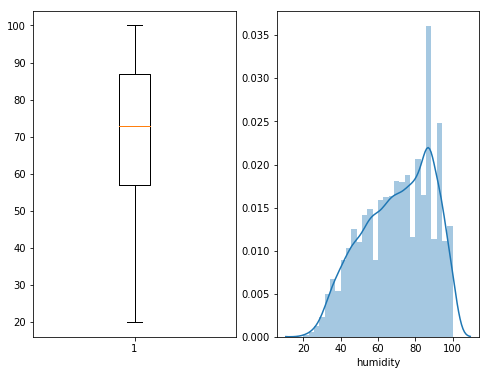

In [39]:
fig = plt.figure(1, figsize=(8,6))
gs = GridSpec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

ax2 = sns.distplot(weather['humidity'])
ax1.boxplot(weather['humidity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28f031a6c88>,
 'caps': [<matplotlib.lines.Line2D at 0x28f031b2518>,
 'boxes': [<matplotlib.lines.Line2D at 0x28f0313c438>],
 'medians': [<matplotlib.lines.Line2D at 0x28f031b2b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x28f031b2e80>],
 'means': []}

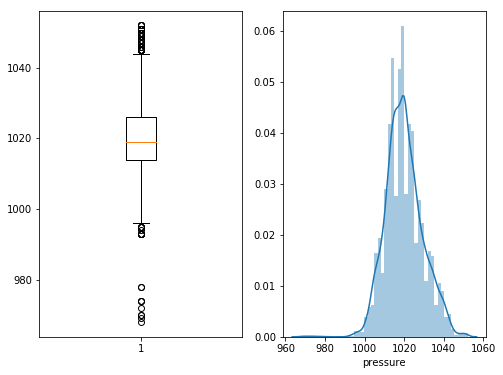

In [40]:
fig = plt.figure(1, figsize=(8,6))
gs = GridSpec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax2 = sns.distplot(weather['pressure'])
ax1.boxplot(weather['pressure'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28f08ea3e10>,
 'caps': [<matplotlib.lines.Line2D at 0x28f08eb06a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28f08d09b00>],
 'medians': [<matplotlib.lines.Line2D at 0x28f08eb0d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x28f08eb90b8>],
 'means': []}

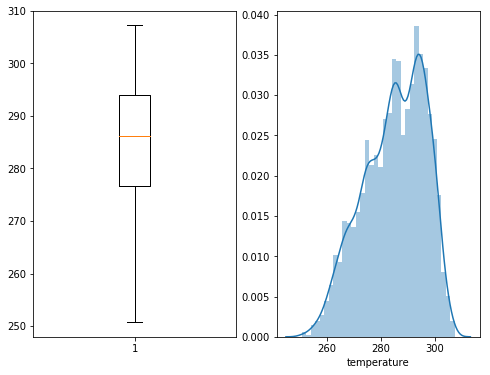

In [41]:
fig = plt.figure(1, figsize=(8,6))
gs = GridSpec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax2 = sns.distplot(weather['temperature'])
ax1.boxplot(weather['temperature'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28f0a2b2c88>,
 'caps': [<matplotlib.lines.Line2D at 0x28f0a2c04a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x28f0a27f438>],
 'medians': [<matplotlib.lines.Line2D at 0x28f0a2c0b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x28f0a2c0e80>],
 'means': []}

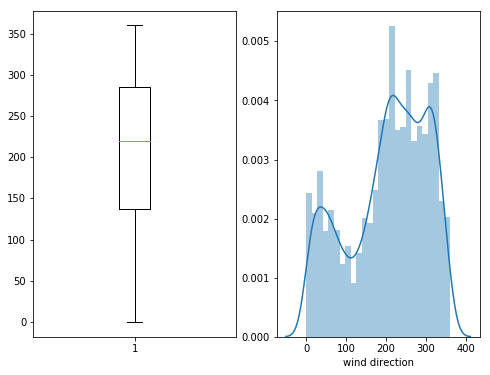

In [42]:
fig = plt.figure(1, figsize=(8,6))
gs = GridSpec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax2 = sns.distplot(weather['wind direction'])
ax1.boxplot(weather['wind direction'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28f0a419a20>,
 'caps': [<matplotlib.lines.Line2D at 0x28f0a3b0278>,
 'boxes': [<matplotlib.lines.Line2D at 0x28f0a3b01d0>],
 'medians': [<matplotlib.lines.Line2D at 0x28f0a4258d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28f0a425c18>],
 'means': []}

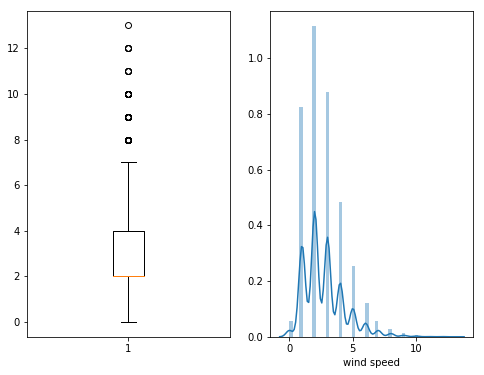

In [43]:
fig = plt.figure(1, figsize=(8,6))
gs = GridSpec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax2 = sns.distplot(weather['wind speed'])
ax1.boxplot(weather['wind speed'])

In [44]:
def unique(list1): 
    unique_list = [] 
    for x in list1: 
        if x not in unique_list: 
            unique_list.append(x) 
    for x in unique_list: 
        print(x)

In [45]:
unique(weather['weather description']) # 23, 원본 데이터는 38개

sky is clear
few clouds
broken clouds
overcast clouds
light rain
moderate rain
heavy intensity rain
light snow
scattered clouds
snow
mist
haze
fog
very heavy rain
light intensity drizzle
proximity thunderstorm
thunderstorm with light rain
thunderstorm
drizzle
squalls
thunderstorm with heavy rain
thunderstorm with rain
smoke
heavy intensity drizzle


{'whiskers': [<matplotlib.lines.Line2D at 0x28f0aafaac8>,
 'caps': [<matplotlib.lines.Line2D at 0x28f0ab07358>,
 'boxes': [<matplotlib.lines.Line2D at 0x28f0a4d1278>],
 'medians': [<matplotlib.lines.Line2D at 0x28f0ab07978>],
 'fliers': [<matplotlib.lines.Line2D at 0x28f0ab07cc0>],
 'means': []}

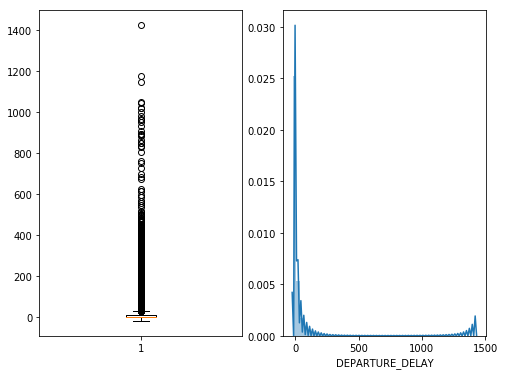

In [46]:
fig = plt.figure(1, figsize=(8,6))
gs = GridSpec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

ax2 = sns.distplot(df_2015_wonull['DEPARTURE_DELAY'])
ax1.boxplot(df_2015_wonull['DEPARTURE_DELAY'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28f0d2f59e8>,
 'caps': [<matplotlib.lines.Line2D at 0x28f0abbb240>,
 'boxes': [<matplotlib.lines.Line2D at 0x28f0abbb1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x28f0d301898>],
 'fliers': [<matplotlib.lines.Line2D at 0x28f0d301be0>],
 'means': []}

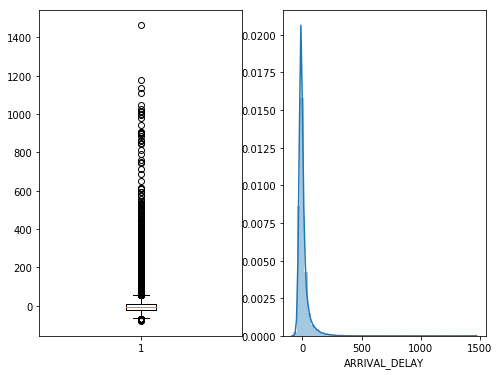

In [47]:
fig = plt.figure(1, figsize=(8,6))
gs = GridSpec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

ax2 = sns.distplot(df_2015_wonull['ARRIVAL_DELAY'])
ax1.boxplot(df_2015_wonull['ARRIVAL_DELAY'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28f0d720dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x28f0d72d6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28f0d6b5588>],
 'medians': [<matplotlib.lines.Line2D at 0x28f0d72dd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x28f0d7350b8>],
 'means': []}

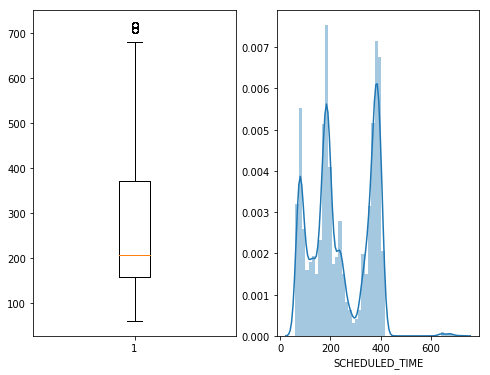

In [48]:
fig = plt.figure(1, figsize=(8,6))
gs = GridSpec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

ax2 = sns.distplot(df_2015_wonull['SCHEDULED_TIME'])
ax1.boxplot(df_2015_wonull['SCHEDULED_TIME'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28f0d8494a8>,
 'caps': [<matplotlib.lines.Line2D at 0x28f0d849d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x28f0d7d5c18>],
 'medians': [<matplotlib.lines.Line2D at 0x28f0d854390>],
 'fliers': [<matplotlib.lines.Line2D at 0x28f0d8546d8>],
 'means': []}

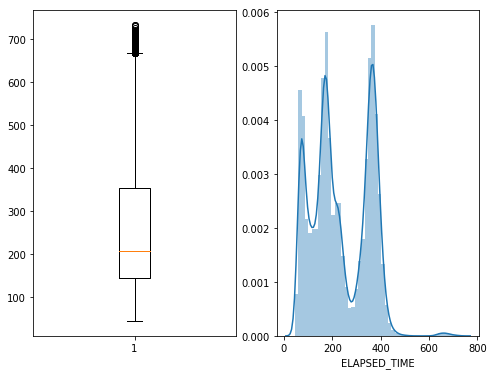

In [49]:
fig = plt.figure(1, figsize=(8,6))
gs = GridSpec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

ax2 = sns.distplot(df_2015_wonull['ELAPSED_TIME'])
ax1.boxplot(df_2015_wonull['ELAPSED_TIME'])

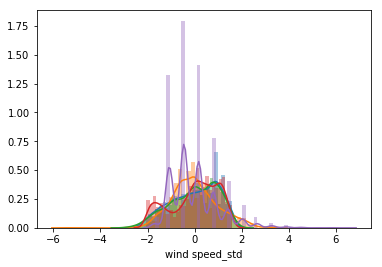

In [50]:
a = sns.distplot(weather['humidity_std'])
a = sns.distplot(weather['pressure_std'])
a = sns.distplot(weather['temperature_std'])
a = sns.distplot(weather['wind direction_std'])
a = sns.distplot(weather['wind speed_std'])
a

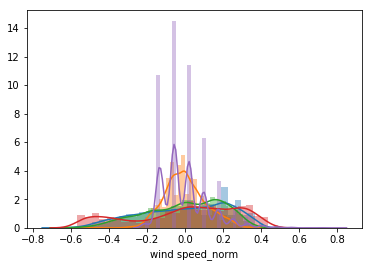

In [51]:
a = sns.distplot(weather['humidity_norm'])
a = sns.distplot(weather['pressure_norm'])
a = sns.distplot(weather['temperature_norm'])
a = sns.distplot(weather['wind direction_norm'])
a = sns.distplot(weather['wind speed_norm'])
a

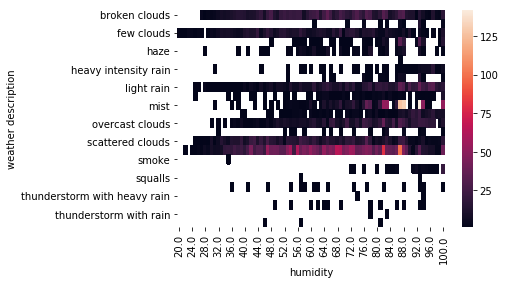

In [52]:
weather_pi= weather.pivot_table('count', 'weather description', 'humidity', aggfunc = 'sum')
sns.heatmap(weather_pi)

In [53]:
weather[:5]
df_fin[:5]

datetime  humidity  pressure  temperature  \
19714 2014-12-31 22:00:00      59.0    1022.0   268.050000   
19715 2014-12-31 23:00:00      69.0    1026.0   268.633089   
19716 2015-01-01 00:00:00      59.0    1022.0   268.050000   
19717 2015-01-01 01:00:00      59.0    1022.0   268.050000   
19718 2015-01-01 02:00:00      58.0    1021.0   267.186000   

      weather description  wind direction  wind speed  humidity_norm  \
19714        sky is clear           249.0         2.0       -0.14472   
19715        sky is clear           250.0         3.0       -0.01972   
19716        sky is clear           249.0         2.0       -0.14472   
19717        sky is clear           249.0         2.0       -0.14472   
19718        sky is clear           246.0         2.0       -0.15722   

       pressure_norm  temperature_norm  wind direction_norm  wind speed_norm  \
19714       0.023959         -0.299192             0.126435        -0.055867   
19715       0.071578         -0.288862             0.129213         0.021056   
19716       0.023959         -0.299192             0.126435        -0.055867   
19717       0.023959         -0.299192             0.126435        -0.055867   
19718       0.012054         -0.314499             0.118102        -0.055867   

       count  humidity_std  pressure_std  temperature_std  wind direction_std  \
19714      1     -0.631944      0.215832        -1.496157            0.457788   
19715      1     -0.086110      0.644805        -1.444501            0.467845   
19716      1     -0.631944      0.215832        -1.496157            0.457788   
19717      1     -0.631944      0.215832        -1.496157            0.457788   
19718      1     -0.686527      0.108589        -1.572701            0.427615   

       wind speed_std  
19714       -0.451543  
19715        0.170189  
19716       -0.451543  
19717       -0.451543  
19718       -0.451543

AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  \
0      B6            JFK                 SJU 2015-01-01 05:35:00   
1      AA            JFK                 MIA 2015-01-01 05:45:00   
2      B6            JFK                 BQN 2015-01-01 05:45:00   
3      B6            JFK                 PBI 2015-01-01 06:00:00   
4      B6            JFK                 MCO 2015-01-01 06:00:00   

  DEPARTURE_TIME  DEPARTURE_DELAY SCHEDULED_ARRIVAL ARRIVAL_TIME  \
0       06:18:00             43.0          10:20:00     10:39:00   
1       06:40:00             55.0          08:50:00     09:59:00   
2       05:45:00              0.0          10:26:00     10:07:00   
3       05:54:00             -6.0          08:58:00     08:36:00   
4       05:57:00             -3.0          08:51:00     08:32:00   

   ARRIVAL_DELAY  SCHEDULED_TIME  ELAPSED_TIME DEPARTURE DELAYED?  \
0           19.0           225.0         201.0                  n   
1           69.0           185.0         199.0                  n   
2          -19.0           221.0         202.0                  n   
3          -22.0           178.0         162.0                  n   
4          -19.0           171.0         155.0                  n   

             datetime  
0 2015-01-01 06:00:00  
1 2015-01-01 06:00:00  
2 2015-01-01 06:00:00  
3 2015-01-01 06:00:00  
4 2015-01-01 06:00:00

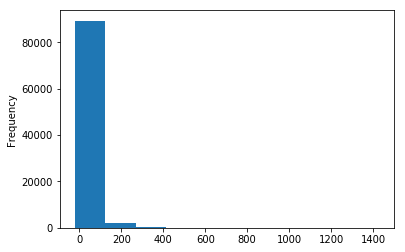

In [54]:
FINAL_SET['DEPARTURE_DELAY'].plot.hist()

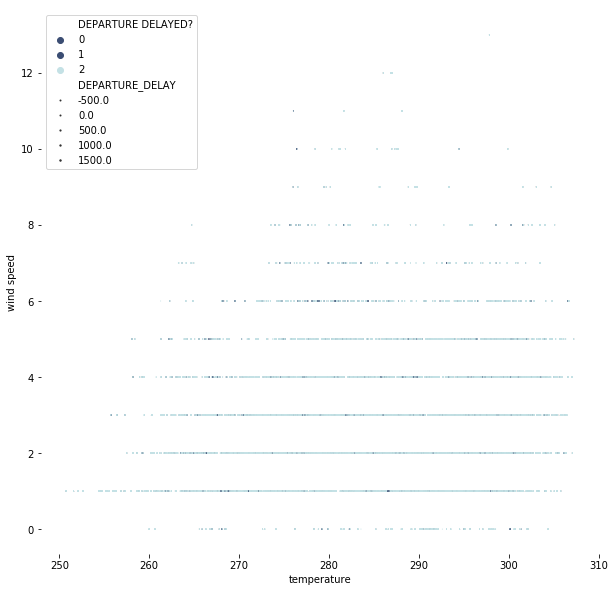

In [55]:
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="temperature", y="wind speed",
                hue = "DEPARTURE DELAYED?",
                palette="ch:r=-.2,d=.3_r",
                size = "DEPARTURE_DELAY",
                sizes=(1,2),
                linewidth=0,
                data=FINAL_SET, ax=ax)

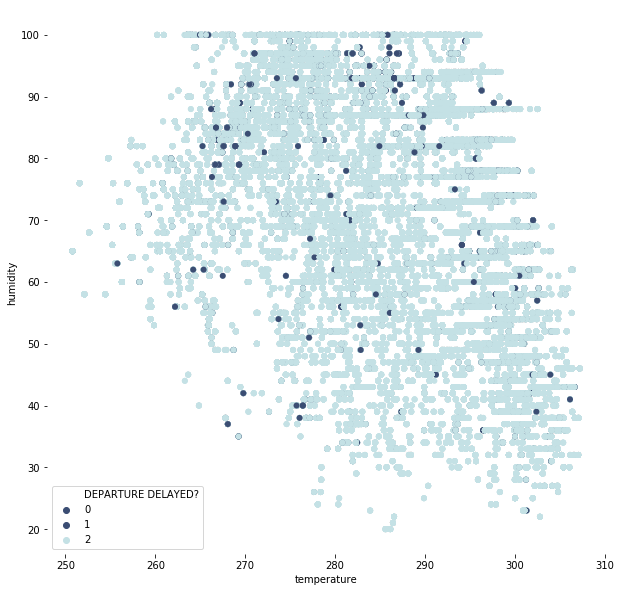

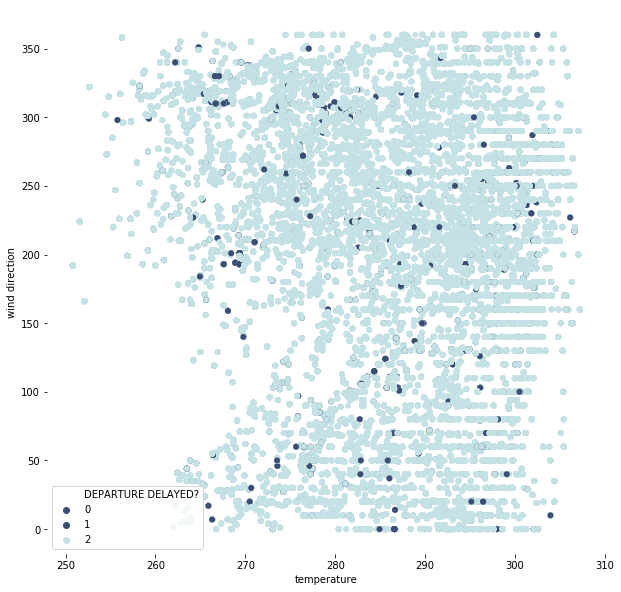

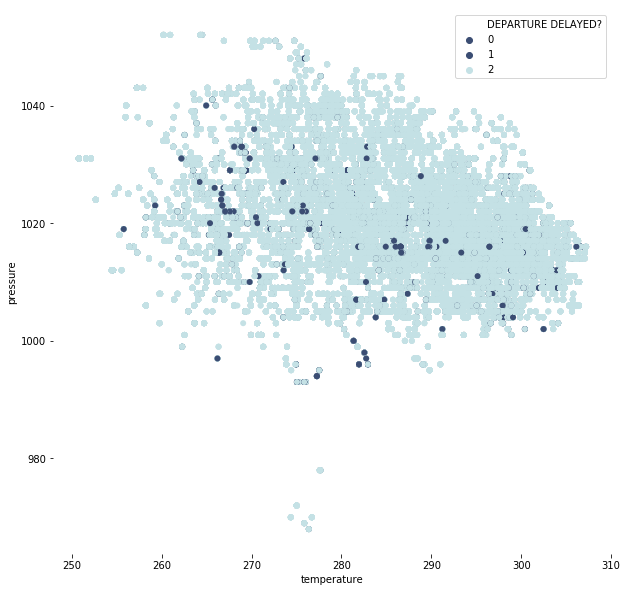

In [56]:


f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="temperature", y="humidity",
                hue = "DEPARTURE DELAYED?",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=FINAL_SET, x_jitter = True, y_jitter = True, ax=ax)

f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="temperature", y="wind direction",
                hue = "DEPARTURE DELAYED?",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=FINAL_SET, x_jitter = True, y_jitter = True, ax=ax)

f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="temperature", y="pressure",
                hue = "DEPARTURE DELAYED?",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=FINAL_SET, x_jitter = True, y_jitter = True, ax=ax)

In [57]:
# 'humidity', 'humidity_std',
#        'pressure', 'pressure_std', 'temperature', 'temperature_std',
#        'wind direction', 'wind direction_std', 'wind speed', 'wind speed_std',

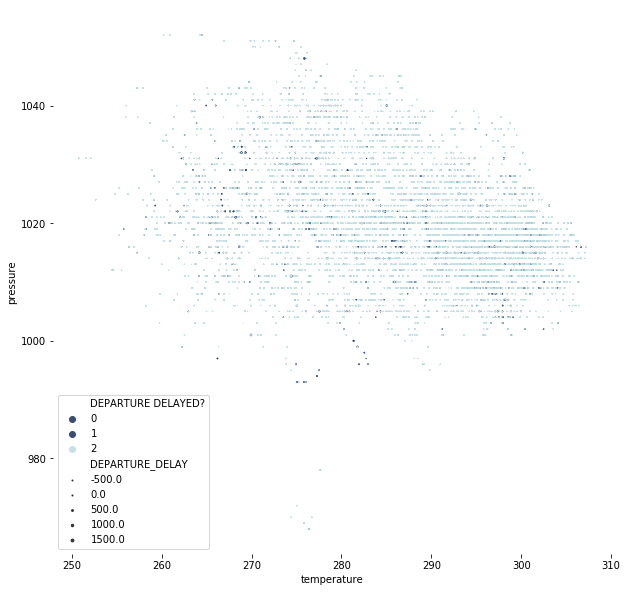

In [58]:
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="temperature", y="pressure",
                hue = "DEPARTURE DELAYED?",
                palette="ch:r=-.2,d=.3_r",
                size = "DEPARTURE_DELAY",
                hue_order="DEPARTURE_DELAY",
                sizes=(1, 8), linewidth=0,
                data=FINAL_SET, x_jitter = True, y_jitter = True, ax=ax)

In [59]:
FINAL_SET.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'DEPARTURE DELAYED?', 'DEPARTURE_DELAY', 'datetime', 'humidity',
       'humidity_std', 'pressure', 'pressure_std', 'temperature',
       'temperature_std', 'wind direction', 'wind direction_std', 'wind speed',
       'wind speed_std', 'weather description_broken clouds',
       'weather description_drizzle', 'weather description_few clouds',
       'weather description_fog', 'weather description_haze',
       'weather description_heavy intensity drizzle',
       'weather description_heavy intensity rain',
       'weather description_light intensity drizzle',
       'weather description_light rain', 'weather description_light snow',
       'weather description_mist', 'weather description_moderate rain',
       'weather description_overcast clouds',
       'weather description_proximity thunderstorm',
       'weather description_scattered clouds',
       'weather description_sky is clear', 'weather description_smoke',
   

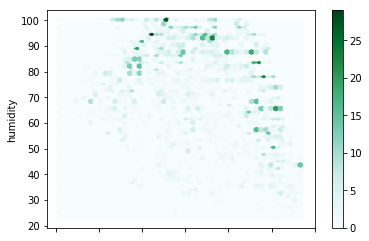

In [60]:
# reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)
FINAL_SET[FINAL_SET['DEPARTURE_DELAY'] >= 120].plot.hexbin(x='temperature', y="humidity", gridsize = 50)

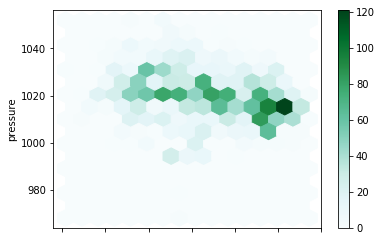

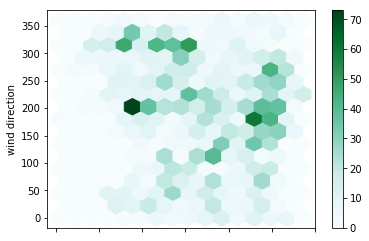

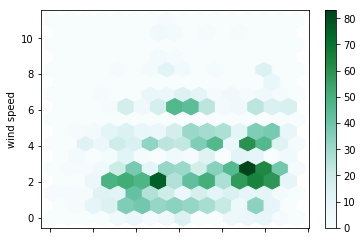

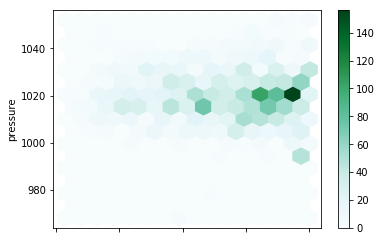

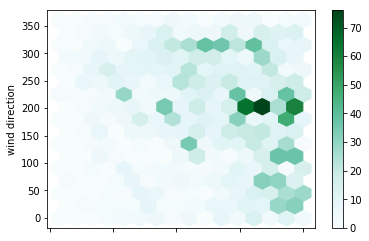

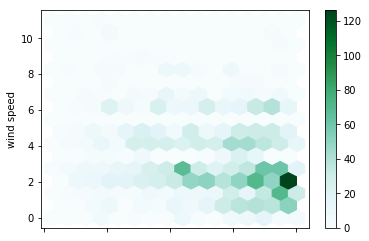

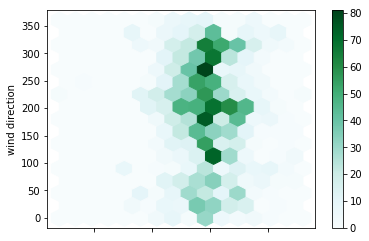

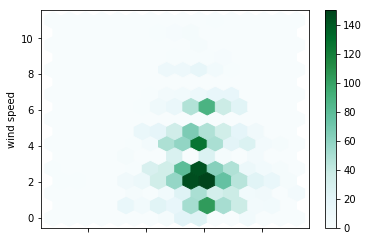

In [61]:
FINAL_SET[FINAL_SET['DEPARTURE_DELAY'] >= 120].plot.hexbin(x='temperature', y='pressure', gridsize = 15)
FINAL_SET[FINAL_SET['DEPARTURE_DELAY'] >= 120].plot.hexbin(x='temperature', y='wind direction', gridsize = 15)
FINAL_SET[FINAL_SET['DEPARTURE_DELAY'] >= 120].plot.hexbin(x='temperature', y='wind speed', gridsize = 15)
FINAL_SET[FINAL_SET['DEPARTURE_DELAY'] >= 120].plot.hexbin(x='humidity', y='pressure', gridsize = 15)
FINAL_SET[FINAL_SET['DEPARTURE_DELAY'] >= 120].plot.hexbin(x='humidity', y='wind direction', gridsize = 15)
FINAL_SET[FINAL_SET['DEPARTURE_DELAY'] >= 120].plot.hexbin(x='humidity', y='wind speed', gridsize = 15)
FINAL_SET[FINAL_SET['DEPARTURE_DELAY'] >= 120].plot.hexbin(x='pressure', y='wind direction', gridsize = 15)
FINAL_SET[FINAL_SET['DEPARTURE_DELAY'] >= 120].plot.hexbin(x='pressure', y='wind speed', gridsize = 15)

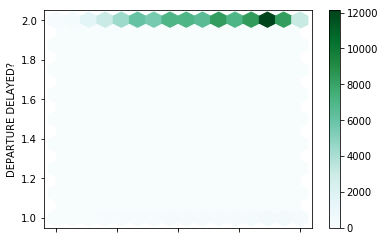

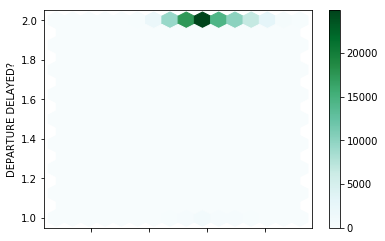

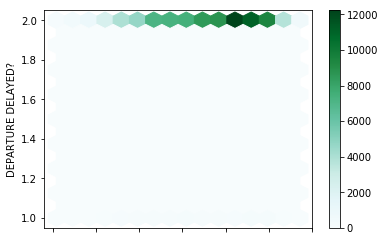

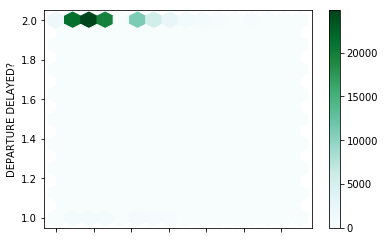

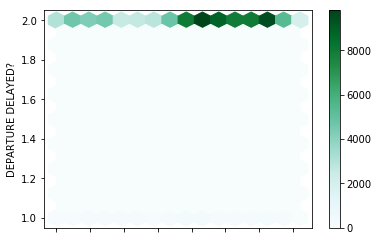

In [62]:
FINAL_SET.plot.hexbin(x='humidity', y='DEPARTURE DELAYED?', gridsize = 15)
FINAL_SET.plot.hexbin(x='pressure', y='DEPARTURE DELAYED?', gridsize = 15)
FINAL_SET.plot.hexbin(x='temperature', y='DEPARTURE DELAYED?', gridsize = 15)
FINAL_SET.plot.hexbin(x='wind speed', y='DEPARTURE DELAYED?', gridsize = 15)
FINAL_SET.plot.hexbin(x='wind direction', y='DEPARTURE DELAYED?', gridsize = 15)


Text(0.5, 0, 'X axis')

Text(0.5, 0, 'Y axis')

Text(0.5, 0, 'Z axis')

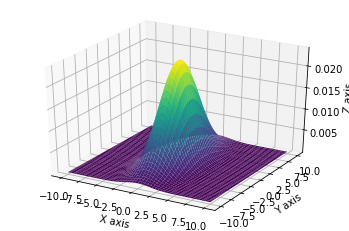

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 15

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [64]:
def plott_3d(x,y):
    #Parameters to set
    mu_x = np.mean(x)
    variance_x = np.var(x)

    mu_y = np.mean(y)
    variance_y = np.var(y)
    
    
    min_x, min_y, max_x, max_y = np.min(x), np.min(y), np.max(x), np.max(y)
    
    #Create grid and multivariate normal
    x = np.linspace(min_x - 1, max_x +1, 500)
    y = np.linspace(0, 3)
    X, Y = np.meshgrid(x,y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y
    rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

    #Make a 3D plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    plt.show()
    multivariate_normal()

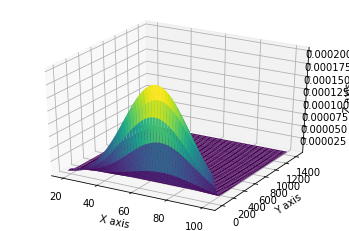

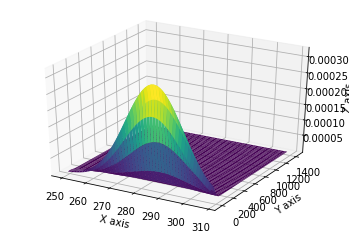

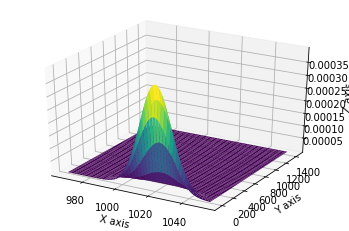

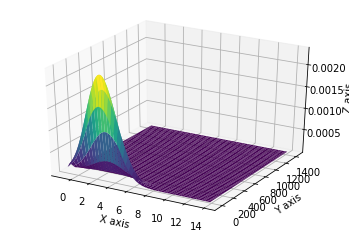

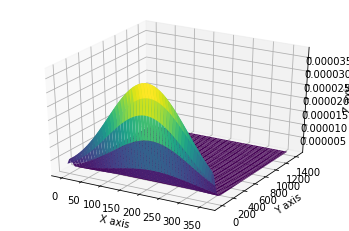

In [65]:
def plott_3d(x,y):
    #Parameters to set
    mu_x = np.mean(x)
    variance_x = np.var(x)

    mu_y = np.mean(y)
    variance_y = np.var(y)
    
    
    min_x, min_y, max_x, max_y = np.min(x), np.min(y), np.max(x), np.max(y)
    
    #Create grid and multivariate normal
    x = np.linspace(min_x - 1, max_x +1, 500)
    y = np.linspace(min_y - 1, max_y +1)
    X, Y = np.meshgrid(x,y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y
    rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

    #Make a 3D plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    plt.show()
    multivariate_normal()
plott_3d(FINAL_SET['humidity'], FINAL_SET['DEPARTURE_DELAY'])
plott_3d(FINAL_SET['temperature'], FINAL_SET['DEPARTURE_DELAY'])
plott_3d(FINAL_SET['pressure'], FINAL_SET['DEPARTURE_DELAY'])
plott_3d(FINAL_SET['wind speed'], FINAL_SET['DEPARTURE_DELAY'])
plott_3d(FINAL_SET['wind direction'], FINAL_SET['DEPARTURE_DELAY'])



(array([5.0000e+00, 1.4000e+01, 1.1100e+02, 6.8600e+02, 5.0570e+03,
        1.6675e+04, 2.1977e+04, 1.4286e+04, 4.6090e+03, 3.5420e+03,
        1.9050e+03, 2.3360e+03, 2.0120e+03, 1.6330e+03, 1.4110e+03,
        1.1690e+03, 1.1160e+03, 9.7200e+02, 8.3500e+02, 7.5600e+02,
        4.5400e+02, 6.5900e+02, 5.5300e+02, 5.5200e+02, 4.6400e+02,
        4.0800e+02, 3.9200e+02, 4.0800e+02, 3.6300e+02, 2.9700e+02,
        2.0600e+02, 2.9200e+02, 2.8000e+02, 2.7100e+02, 2.4100e+02,
        1.8700e+02, 2.0800e+02, 1.8500e+02, 2.2600e+02, 1.7300e+02,
        1.1100e+02, 1.7100e+02, 1.5700e+02, 1.4300e+02, 1.3800e+02,
        1.2300e+02, 1.3900e+02, 1.3900e+02, 1.2500e+02, 1.1800e+02,
        9.7000e+01, 6.8000e+01, 9.6000e+01, 1.0300e+02, 8.2000e+01,
        8.6000e+01, 8.2000e+01, 7.2000e+01, 7.0000e+01, 5.6000e+01,
        7.6000e+01, 3.9000e+01, 6.7000e+01, 4.4000e+01, 5.8000e+01,
        5.3000e+01, 4.1000e+01, 4.5000e+01, 4.7000e+01, 4.7000e+01,
        5.0000e+01, 3.1000e+01, 2.9000e+01, 3.70

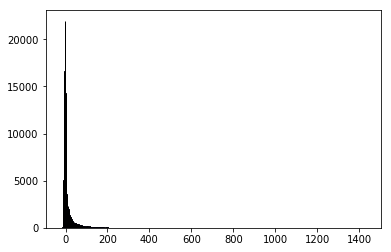

In [66]:
plt.hist(FINAL_SET['DEPARTURE_DELAY'], color = 'blue', edgecolor = 'black', bins = 500)


(array([118., 105.,  65.,  93., 110.,  54.,  88.,  54.,  82.,  72.,  50.,
         55.,  78.,  41.,  62.,  38.,  52.,  51.,  36.,  41.,  28.,  53.,
         38.,  35.,  50.,  35.,  20.,  42.,  27.,  30.,  36.,  23.,  29.,
         33.,  17.,  19.,  18.,  23.,  26.,  12.,  21.,  12.,  23.,  25.,
         16.,  23.,  18.,  11.,  22.,   9.,  21.,  16.,  12.,  12.,  16.,
         17.,   9.,   6.,  12.,   3.,  10.,   9.,   9.,  10.,   5.,  11.,
          7.,   4.,   7.,   5.,   4.,  13.,   6.,   6.,  12.,   5.,   7.,
          1.,   3.,   5.,   5.,   2.,   5.,   5.,   4.,   2.,   3.,   5.,
          3.,   2.,   2.,   1.,   2.,   3.,   0.,   3.,   2.,   3.,   2.,
          0.,   2.,   1.,   0.,   2.,   1.,   2.,   0.,   2.,   2.,   2.,
          2.,   2.,   1.,   1.,   1.,   2.,   1.,   0.,   2.,   2.,   0.,
          1.,   1.,   1.,   2.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
          3.,   1.,   1.,   1.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,
          1.,   2.,   2.,   0.,   0., 

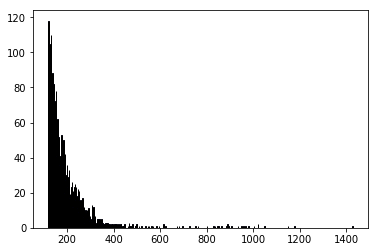

In [67]:
plt.hist(FINAL_SET['DEPARTURE_DELAY'], color = 'blue', range = (120,max(FINAL_SET['DEPARTURE_DELAY'])), edgecolor = 'black', bins = 500)

In [68]:
FINAL_SET.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'DEPARTURE DELAYED?', 'DEPARTURE_DELAY', 'datetime', 'humidity',
       'humidity_std', 'pressure', 'pressure_std', 'temperature',
       'temperature_std', 'wind direction', 'wind direction_std', 'wind speed',
       'wind speed_std', 'weather description_broken clouds',
       'weather description_drizzle', 'weather description_few clouds',
       'weather description_fog', 'weather description_haze',
       'weather description_heavy intensity drizzle',
       'weather description_heavy intensity rain',
       'weather description_light intensity drizzle',
       'weather description_light rain', 'weather description_light snow',
       'weather description_mist', 'weather description_moderate rain',
       'weather description_overcast clouds',
       'weather description_proximity thunderstorm',
       'weather description_scattered clouds',
       'weather description_sky is clear', 'weather description_smoke',
   


Descriptive statistics / univariate analysis


central tendency, spread, skewness, and kurtosis 

central tendency
    mean, median(robustnetss), mode
    
spread
    var, stdev
    ANOVA
    quantile, IQR, boxplot
    range

    Skewness (e) or kurtosis (u)            Conclusion
    −2SE(e) < e < 2SE(e)                    not skewed
    e ≤ −2SE(e)                            negative skew
    e ≥ 2SE(e)                             positive skew
    −2SE(u) < u < 2SE(u)                    not kurtotic
    u ≤ −2SE(u)                            negative kurtosis
    u ≥ 2SE(u)                             positive kurtosi


bi/multivariate ananlysis
    correlation analysis
    quantitative feature - quantitative feature
    categorical feature - quantitative feature
    d







array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F13E0E320>,
      dtype=object)

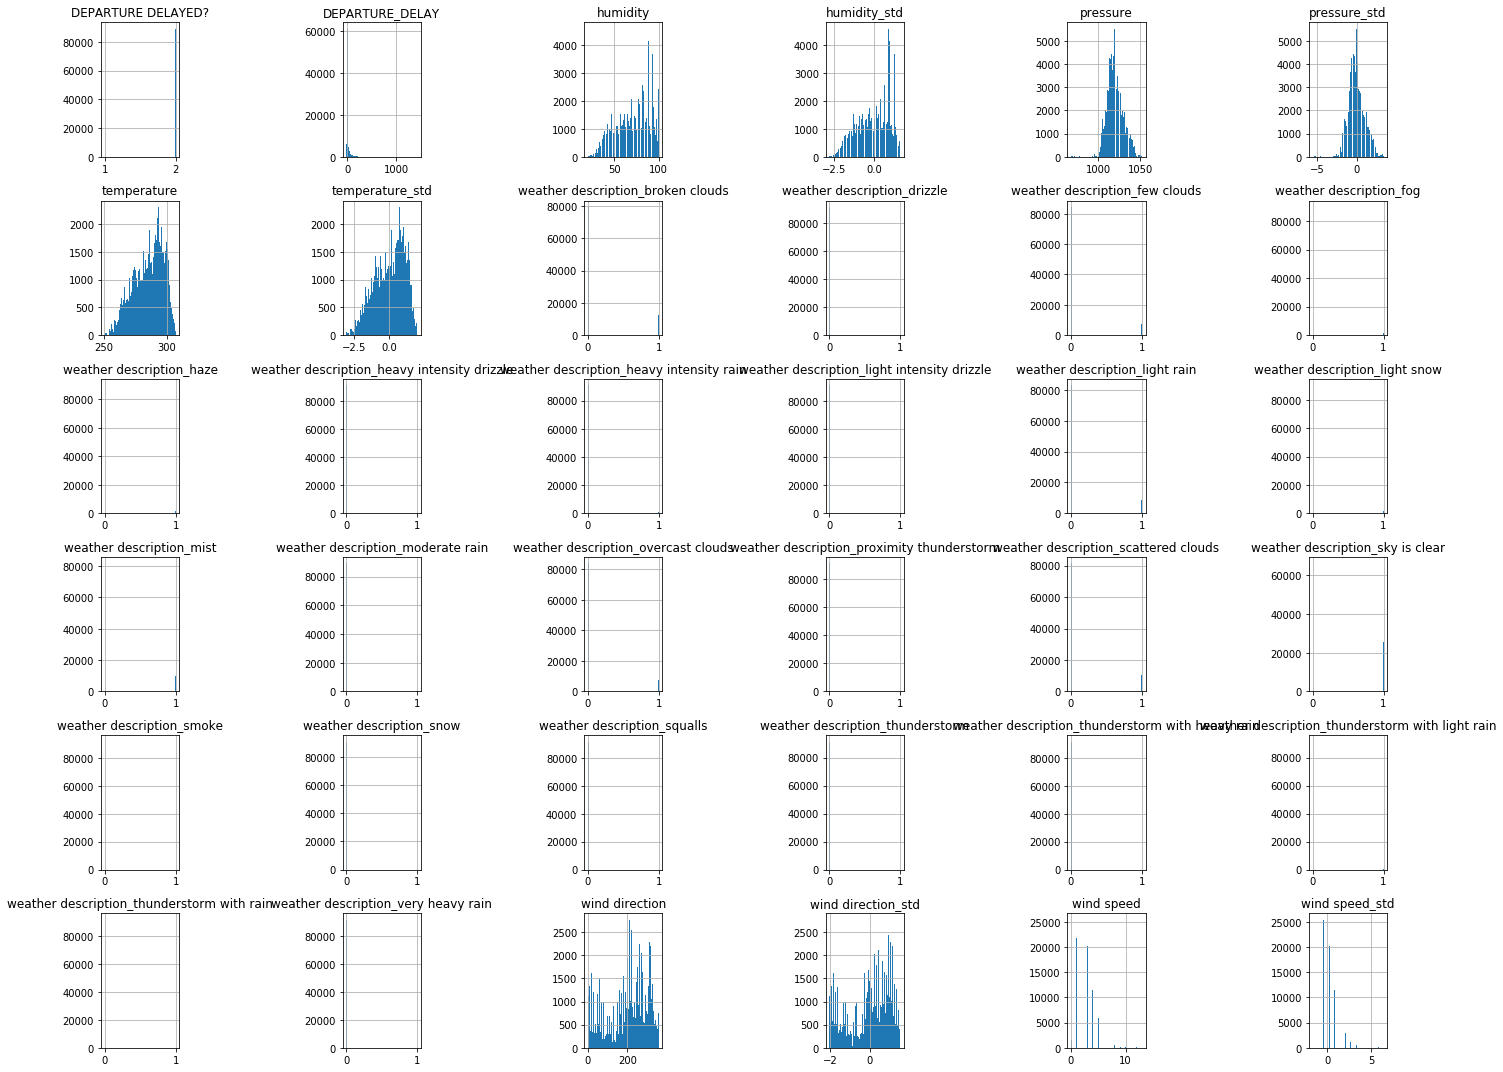

In [69]:
FINAL_SET.hist(bins=100, figsize=(20,15))
plt.tight_layout()
plt.show()

In [70]:
corr_matrix = FINAL_SET.corr()
corr_matrix

DEPARTURE DELAYED?  \
DEPARTURE DELAYED?                                          1.000000   
DEPARTURE_DELAY                                            -0.745251   
humidity                                                   -0.045401   
humidity_std                                               -0.045401   
pressure                                                    0.016830   
pressure_std                                                0.016830   
temperature                                                 0.017010   
temperature_std                                             0.017010   
wind direction                                              0.018010   
wind direction_std                                          0.018010   
wind speed                                                 -0.048450   
wind speed_std                                             -0.048450   
weather description_broken clouds                           0.020984   
weather description_drizzle                                -0.007532   
weather description_few clouds                              0.019820   
weather description_fog                                    -0.000900   
weather description_haze                                   -0.009663   
weather description_heavy intensity drizzle                 0.002294   
weather description_heavy intensity rain                   -0.069769   
weather description_light intensity drizzle                -0.009473   
weather description_light rain                             -0.025181   
weather description_light snow                             -0.015200   
weather description_mist                                   -0.006340   
weather description_moderate rain                          -0.038110   
weather description_overcast clouds                        -0.017488   
weather description_proximity thunderstorm                 -0.011253   
weather description_scattered clouds                        0.015200   
weather description_sky is clear                            0.040180   
weather description_smoke                                   0.001472   
weather description_snow                                   -0.025545   
weather description_squalls                                 0.002782   
weather description_thunderstorm                           -0.005913   
weather description_thunderstorm with heavy rain           -0.019929   
weather description_thunderstorm with light rain            0.005254   
weather description_thunderstorm with rain                 -0.006533   
weather description_very heavy rain                        -0.060423   

                                                  DEPARTURE_DELAY  humidity  \
DEPARTURE DELAYED?                                      -0.745251 -0.045401   
DEPARTURE_DELAY                                          1.000000  0.045071   
humidity                                                 0.045071  1.000000   
humidity_std                                             0.045071  1.000000   
pressure                                                -0.037146  0.017098   
pressure_std                                            -0.037146  0.017098   
temperature                                             -0.030018 -0.332391   
temperature_std                                         -0.030018 -0.332391   
wind direction                                          -0.020359 -0.107905   
wind direction_std                                      -0.020359 -0.107905   
wind speed                                               0.079799 -0.236319   
wind speed_std                                           0.079799 -0.236319   
weather description_broken clouds                       -0.021778 -0.125032   
weather description_drizzle                              0.014509  0.061738   
weather description_few clouds                          -0.030326 -0.153678   
weather description_fog                                  0.003471  0.127742   
weather description_haze                  

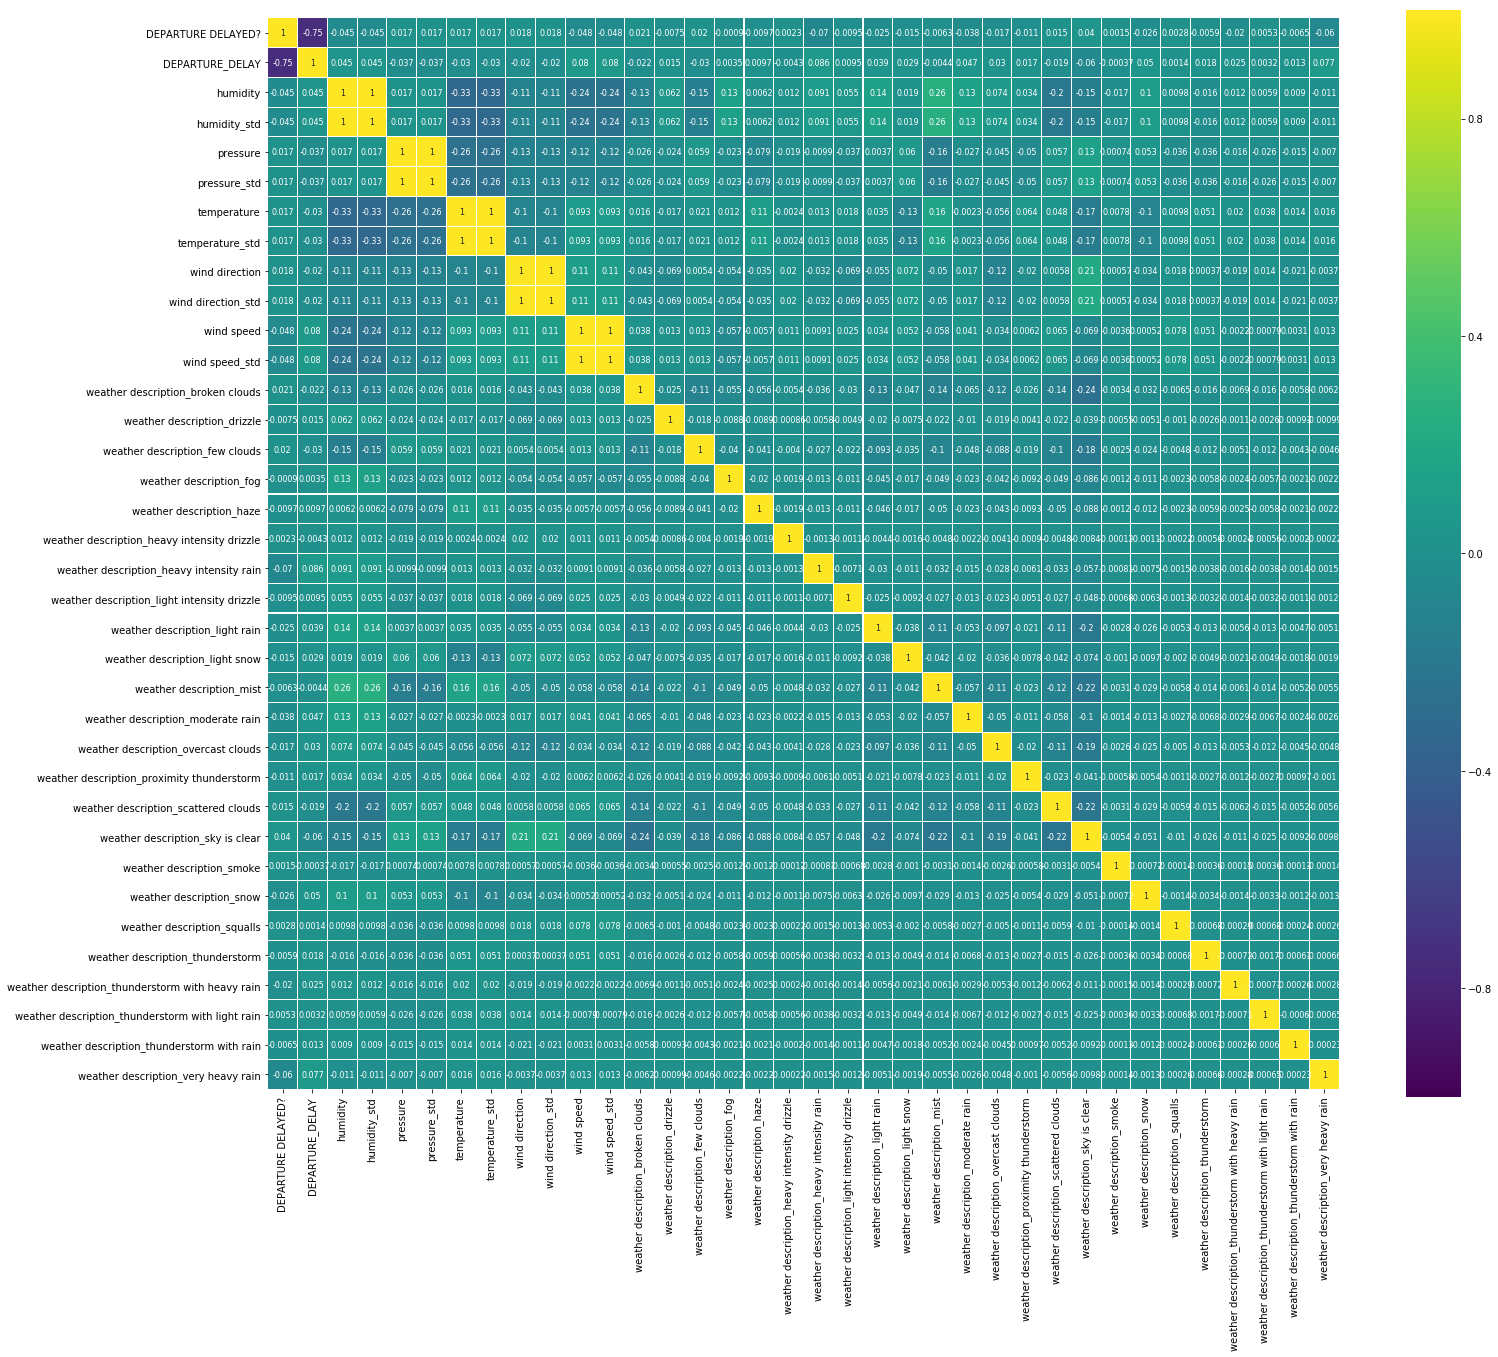

In [71]:
plt.figure(figsize=(24, 20))

sns.heatmap(corr_matrix, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

y값으로 1,2 범주형 변수가 아닌 departure delay 사용하고, hue는 departure delay가 120 이상인것에 표시(y,n)

<Figure size 1728x1440 with 0 Axes>

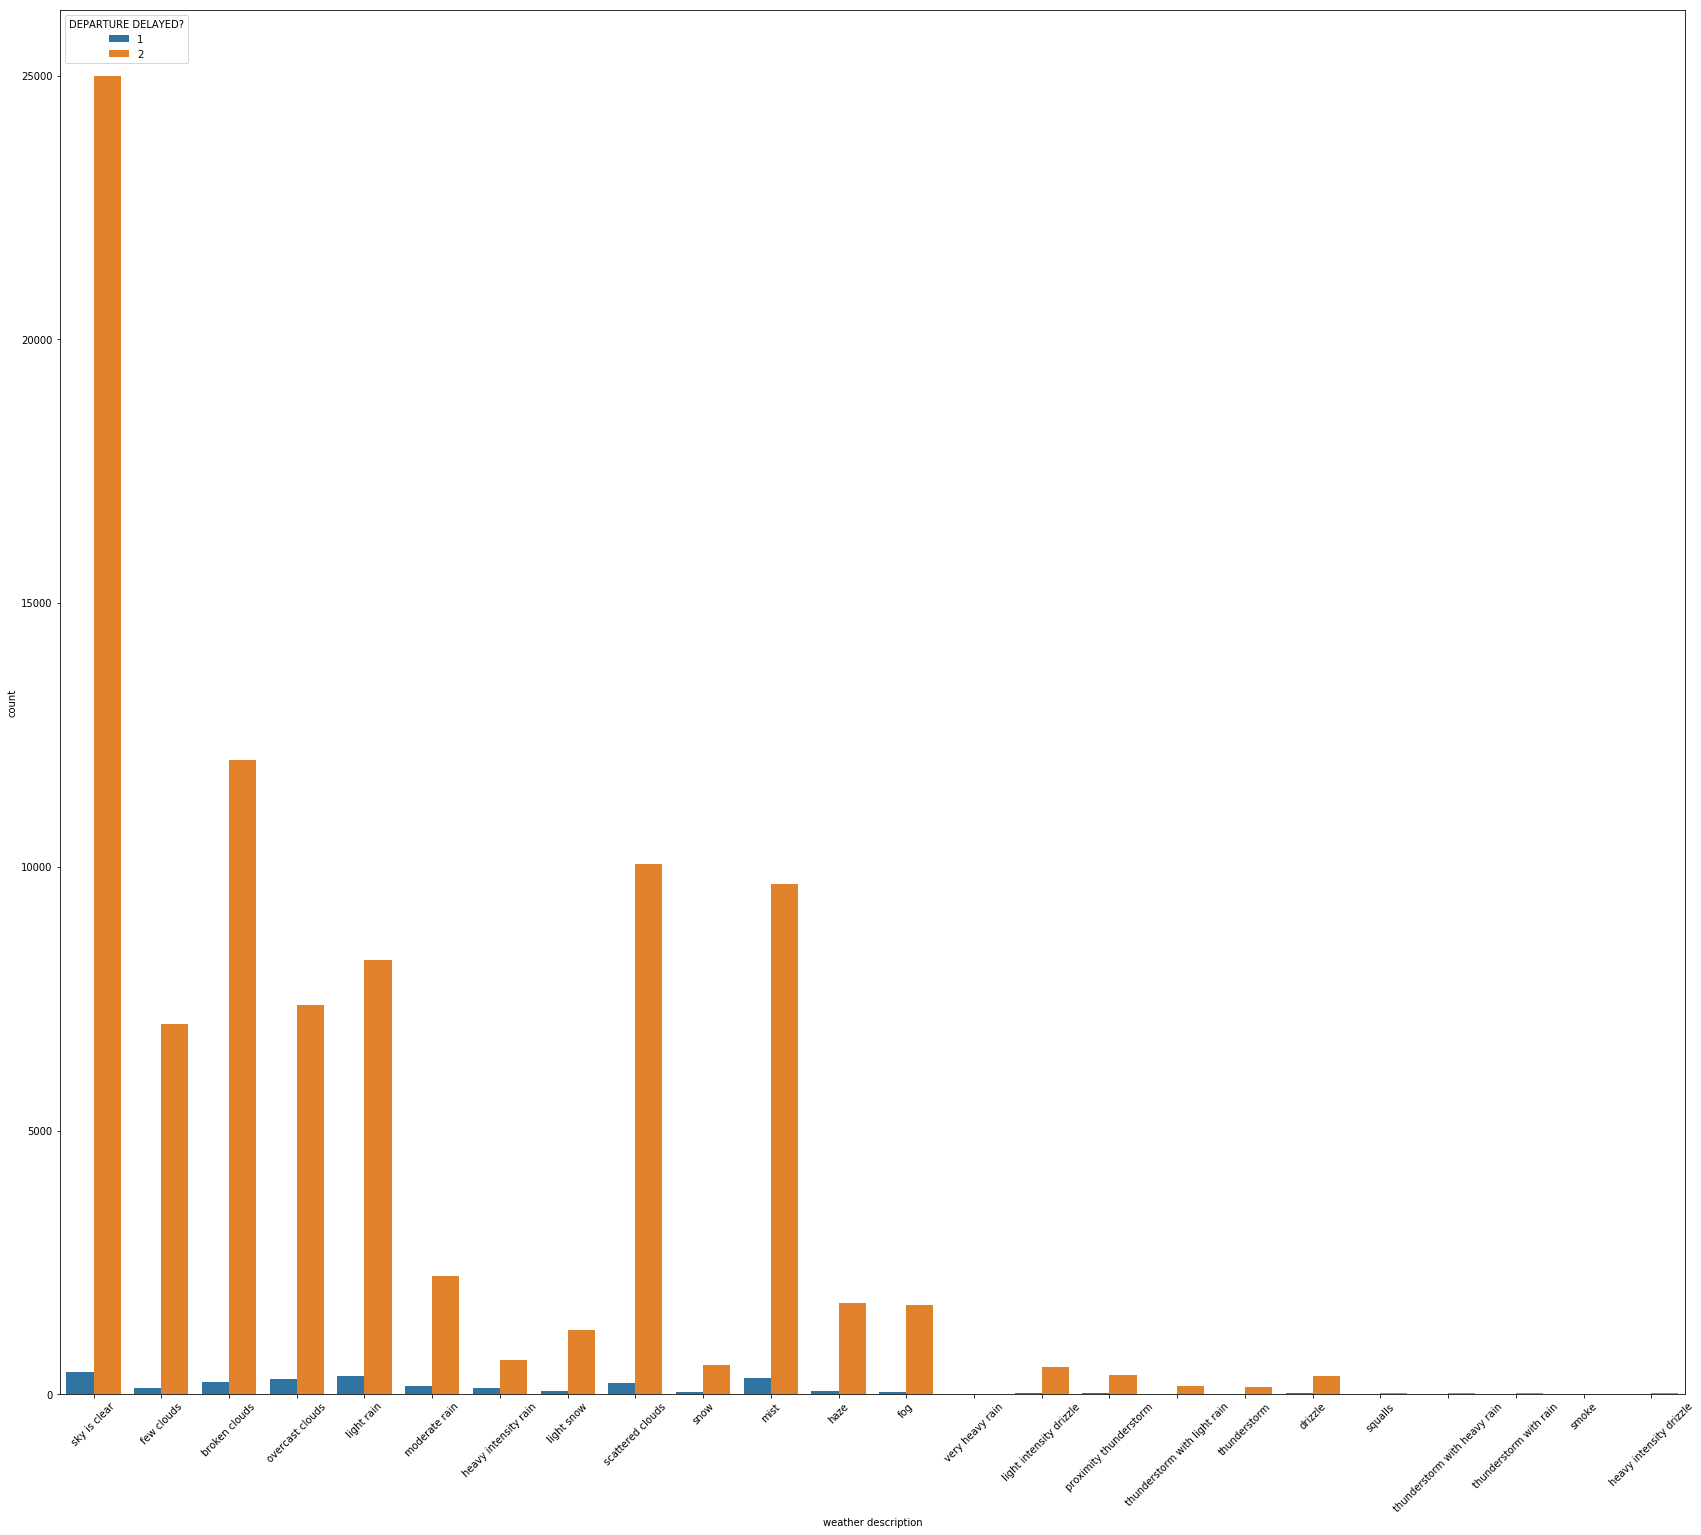

In [72]:
plt.figure(figsize=(24, 20))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0,0])

ax1 = sns.countplot(x="weather description", hue="DEPARTURE DELAYED?", data=FINAL_SET)
ax1 = plt.tight_layout()
ax1 = plt.xticks(rotation=45)


In [73]:
# plt.figure(figsize=(10,50))
# gs = GridSpec(1,1)
# ax1 = fig.add_subplot(gs[0,0])

# ax1 = sns.catplot(x="weather description", hue="DEPARTURE DELAYED?", col="DEPARTURE_DELAY", data=FINAL_SET, kind="count")
# ax1 = plt.tight_layout()
# ax1 = plt.xticks(rotation=45)


In [74]:
FINAL_SET.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'DEPARTURE DELAYED?', 'DEPARTURE_DELAY', 'datetime', 'humidity',
       'humidity_std', 'pressure', 'pressure_std', 'temperature',
       'temperature_std', 'wind direction', 'wind direction_std', 'wind speed',
       'wind speed_std', 'weather description_broken clouds',
       'weather description_drizzle', 'weather description_few clouds',
       'weather description_fog', 'weather description_haze',
       'weather description_heavy intensity drizzle',
       'weather description_heavy intensity rain',
       'weather description_light intensity drizzle',
       'weather description_light rain', 'weather description_light snow',
       'weather description_mist', 'weather description_moderate rain',
       'weather description_overcast clouds',
       'weather description_proximity thunderstorm',
       'weather description_scattered clouds',
       'weather description_sky is clear', 'weather description_smoke',
   

In [75]:
# sns.pairplot(FINAL_SET,hue = 'DEPARTURE DELAYED?')

C:\Users\Playdata\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Playdata\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Playdata\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


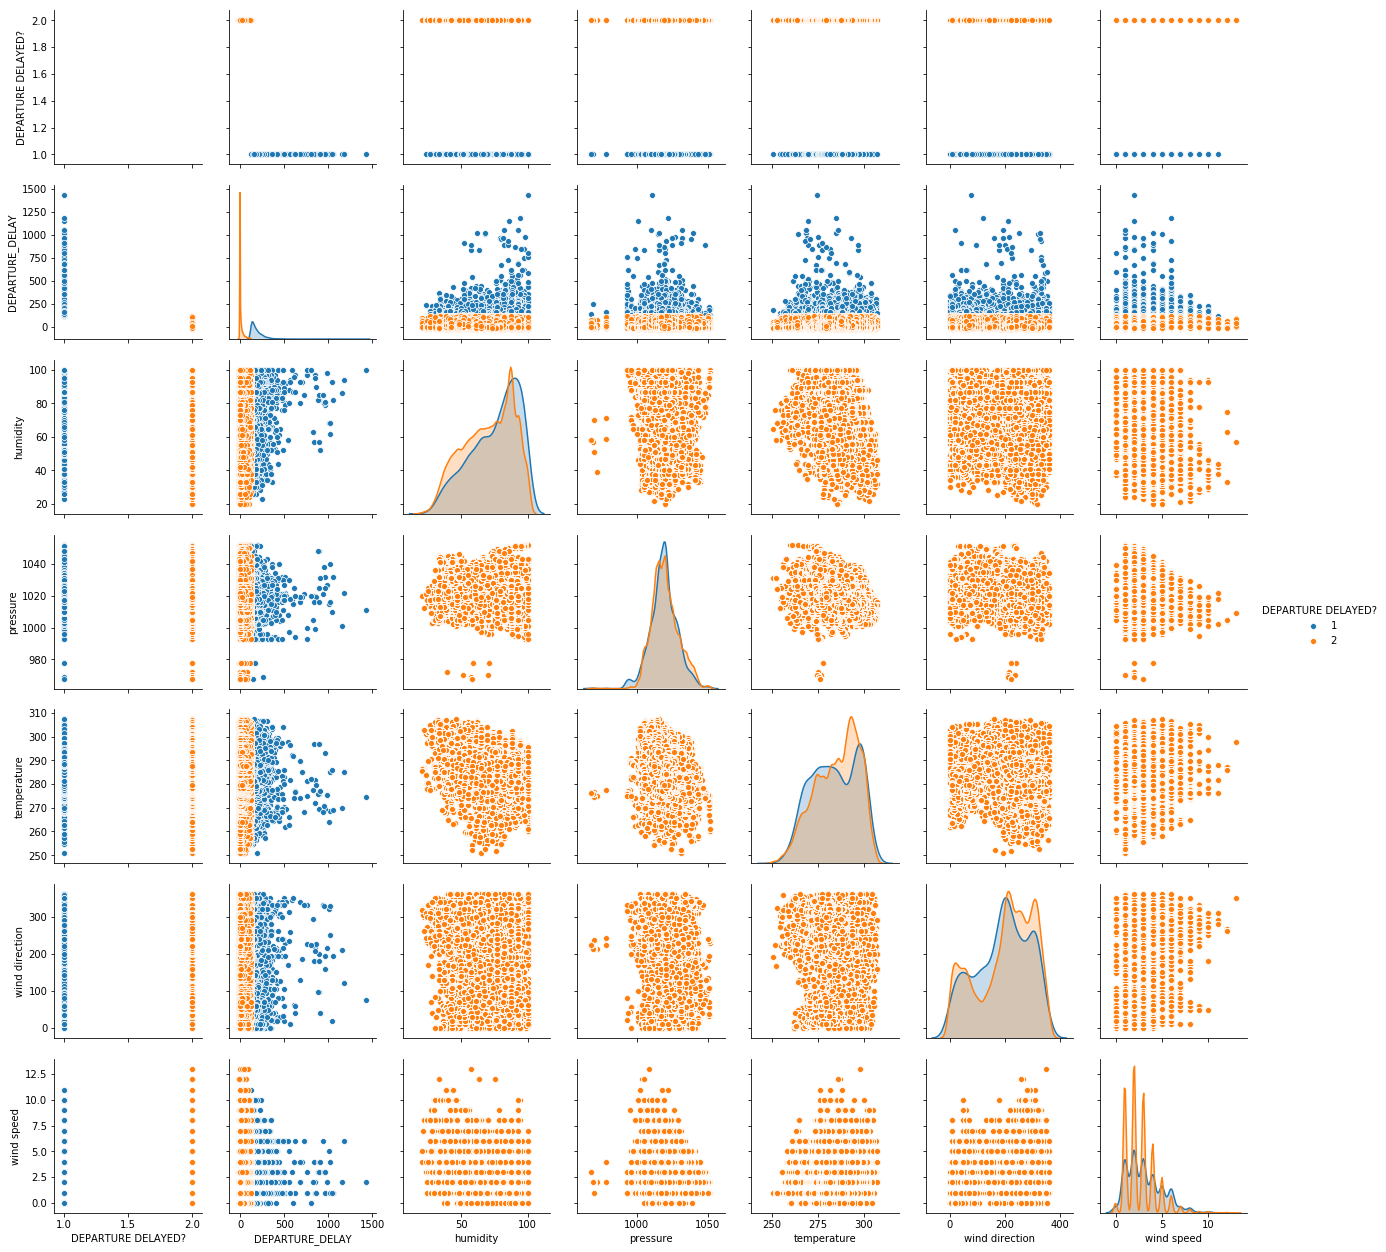

In [76]:
FINAL_SET1 = FINAL_SET[['DEPARTURE DELAYED?', 'DEPARTURE_DELAY', 'datetime', 'humidity',
       'pressure', 'temperature', 'wind direction','wind speed']]
sns.pairplot(FINAL_SET1, hue = 'DEPARTURE DELAYED?')


In [77]:
FINAL_SET['weather description'].astype('category')

0           sky is clear
1           sky is clear
2           sky is clear
3           sky is clear
4           sky is clear
5           sky is clear
6           sky is clear
7           sky is clear
8           sky is clear
9           sky is clear
10          sky is clear
11          sky is clear
12          sky is clear
13          sky is clear
14          sky is clear
15          sky is clear
16          sky is clear
17          sky is clear
18          sky is clear
19          sky is clear
20          sky is clear
21          sky is clear
22          sky is clear
23          sky is clear
24          sky is clear
25          sky is clear
26          sky is clear
27          sky is clear
28          sky is clear
29          sky is clear
              ...       
91633    overcast clouds
91634    overcast clouds
91635    overcast clouds
91636    overcast clouds
91637    overcast clouds
91638    overcast clouds
91639    overcast clouds
91640    overcast clouds
91641    overcast clouds


In [78]:
# FINAL_SET['datetime'] = pd.to_datetime(FINAL_SET['datetime'], infer_datetime_format = True)
FINAL_SET['datetime_hour'] = FINAL_SET['datetime'].dt.hour

<Figure size 1728x1440 with 0 Axes>

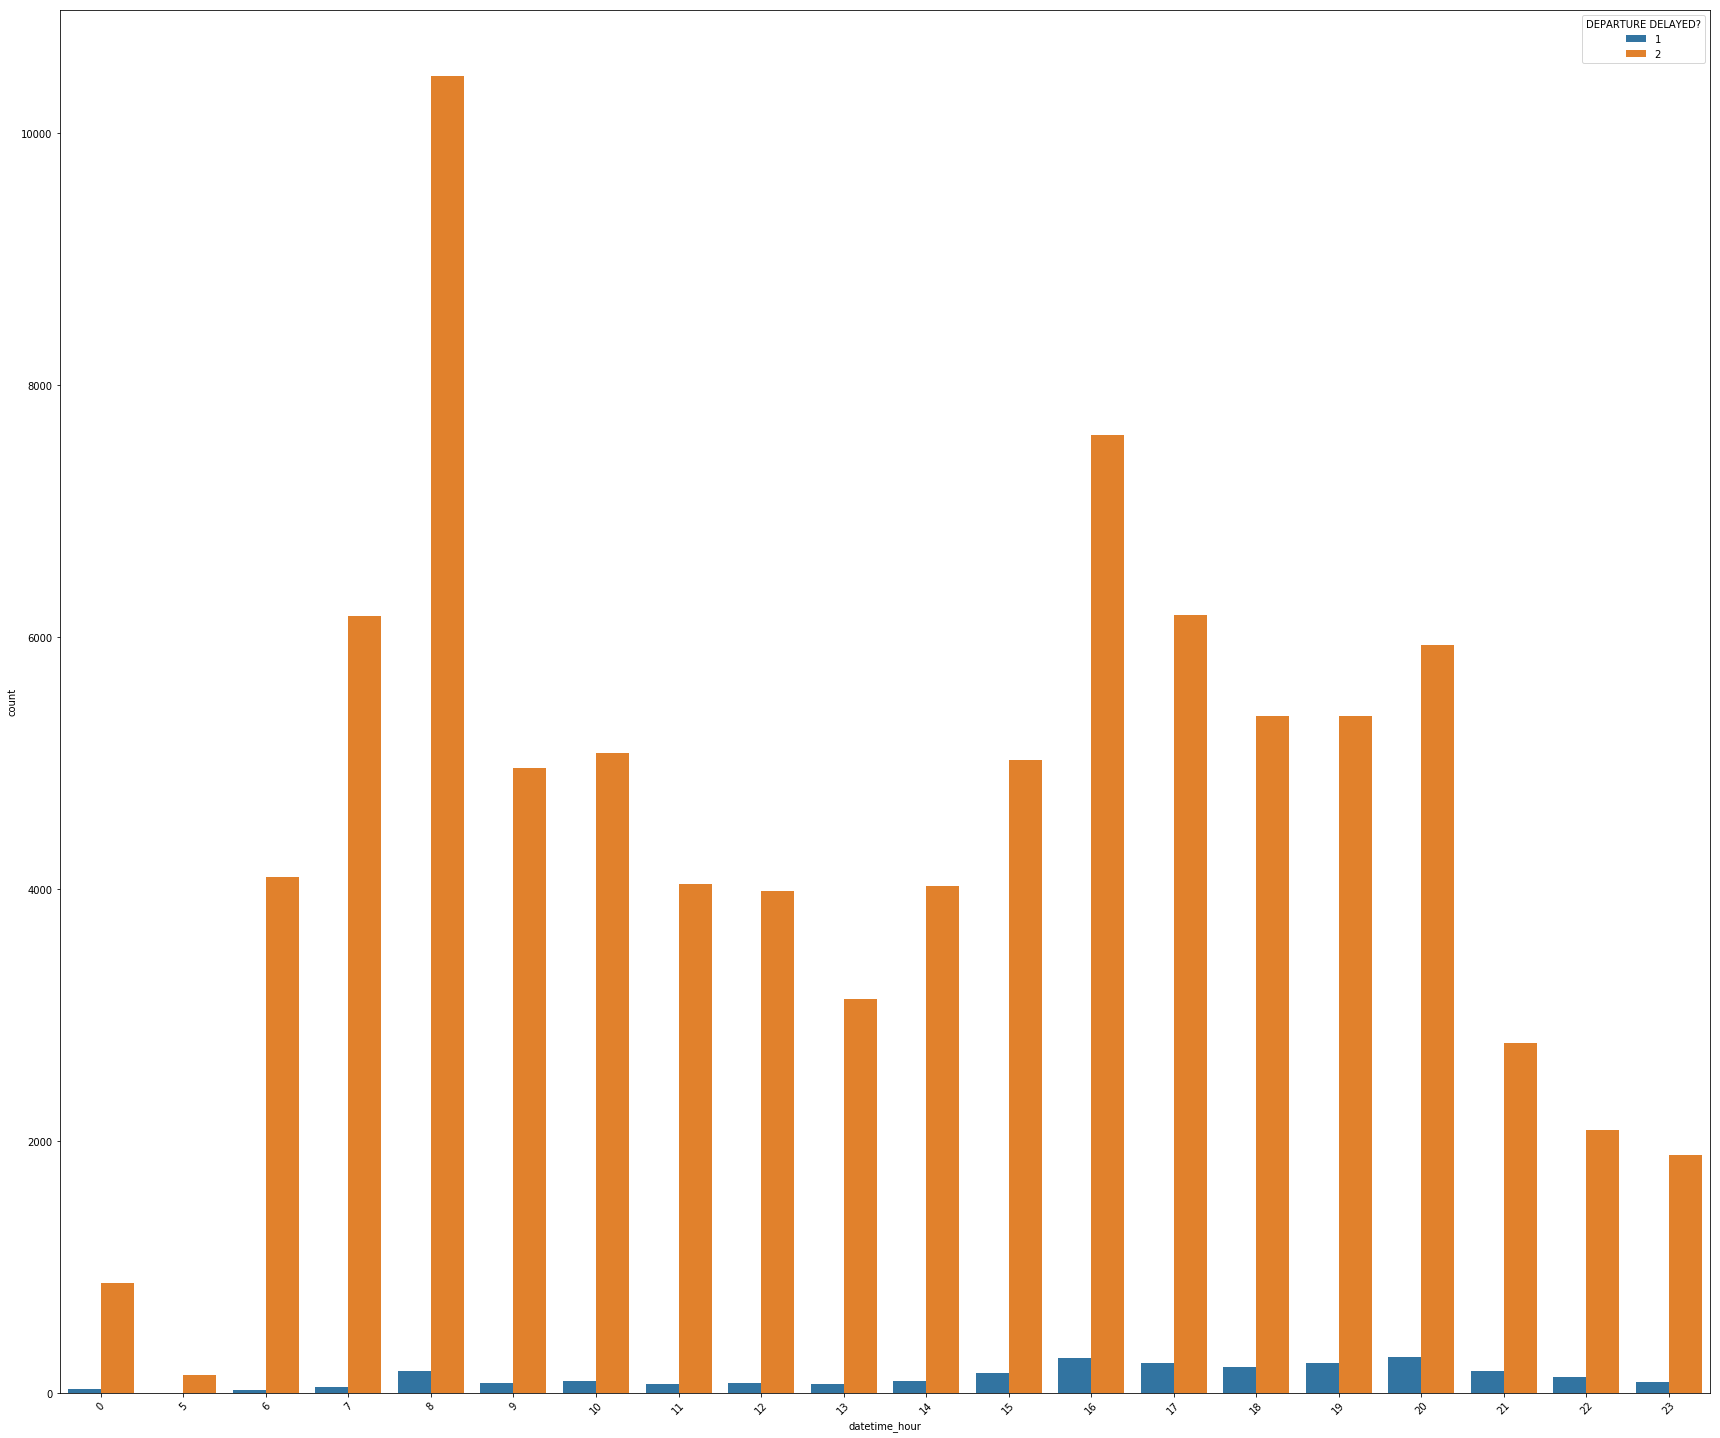

In [79]:
plt.figure(figsize=(24, 20))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0,0])

ax1 = sns.countplot(x=FINAL_SET['datetime_hour'], hue="DEPARTURE DELAYED?", data=FINAL_SET)
ax1 = plt.tight_layout()
ax1 = plt.xticks(rotation=45)

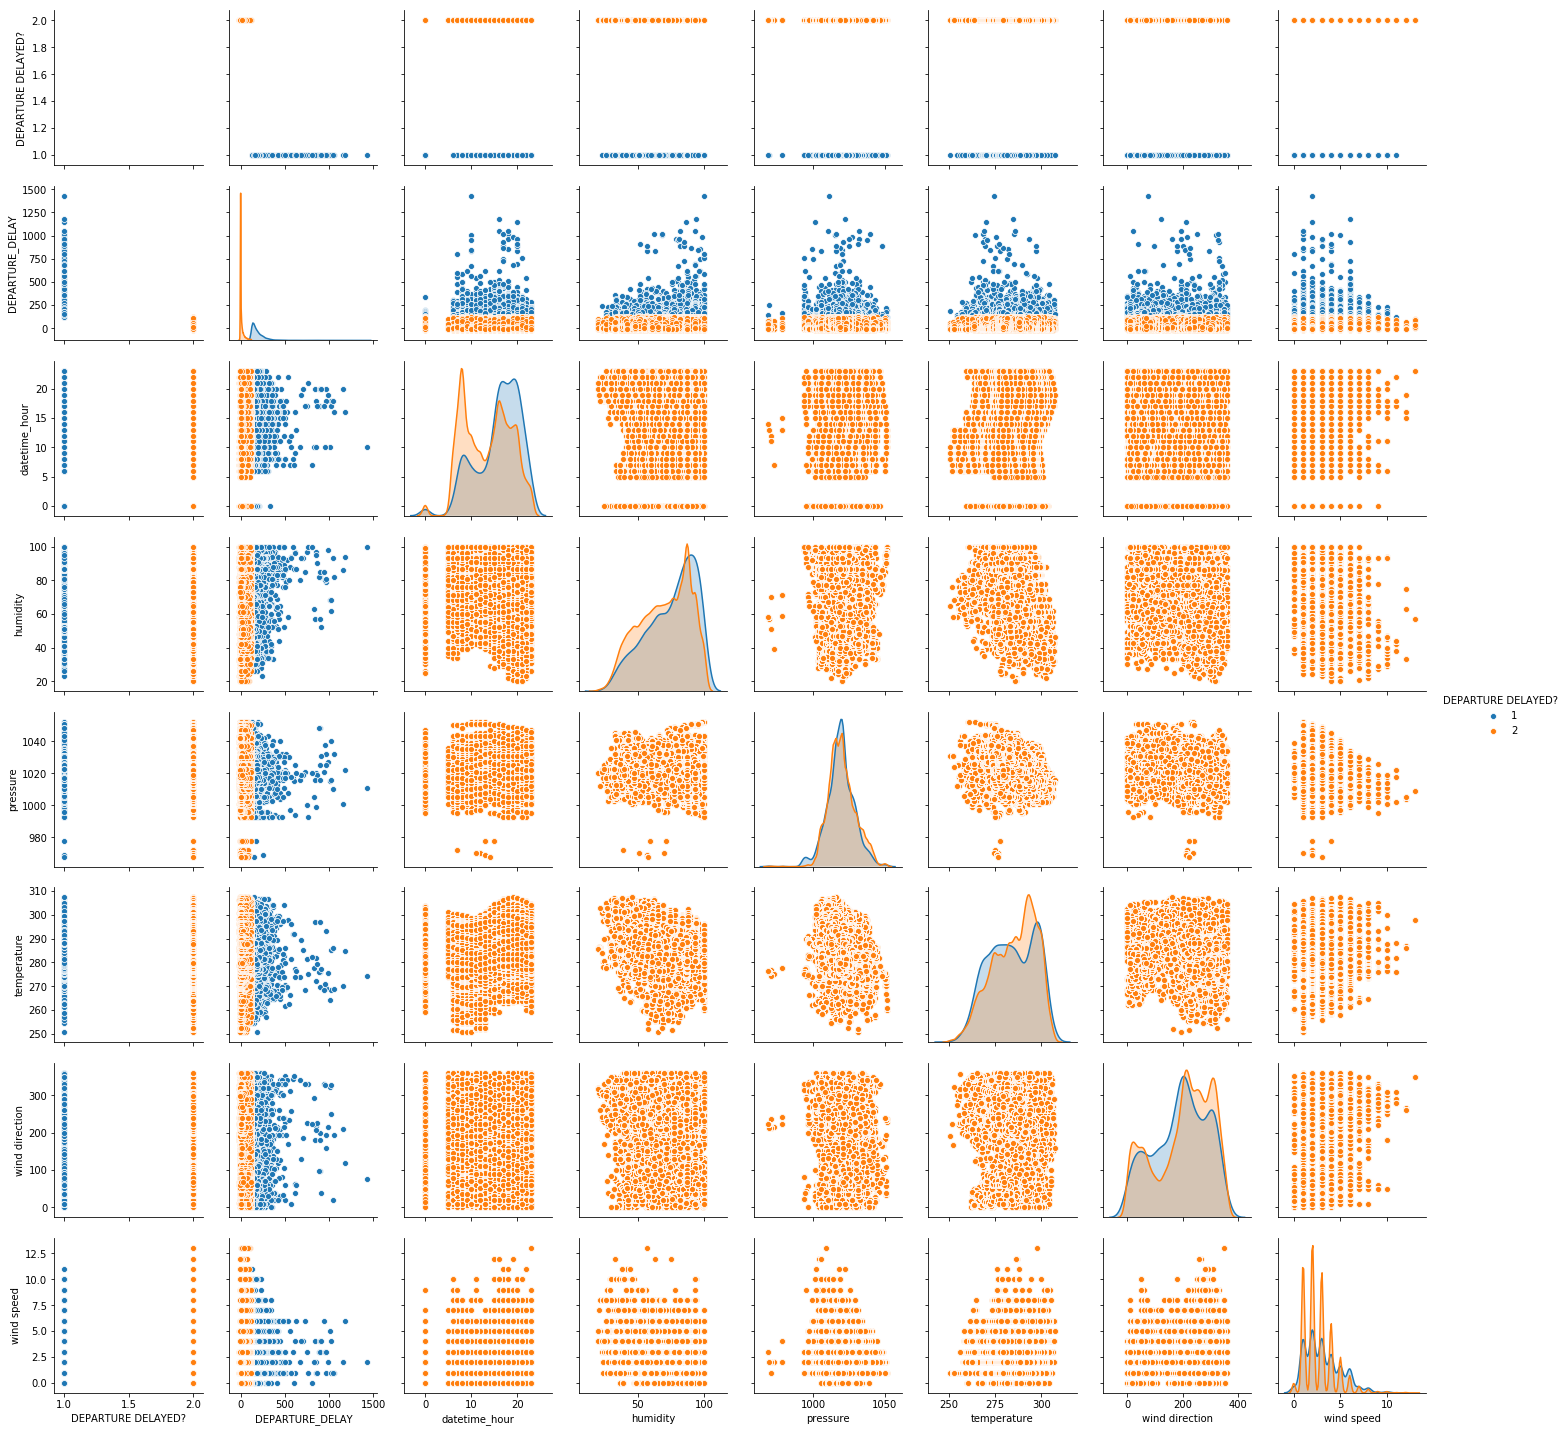

In [80]:
FINAL_SET1 = FINAL_SET[['DEPARTURE DELAYED?', 'DEPARTURE_DELAY', 'datetime_hour', 'humidity',
       'pressure', 'temperature', 'wind direction','wind speed']]
sns.pairplot(FINAL_SET1, hue = 'DEPARTURE DELAYED?')


In [81]:
FINAL_SET['DESTINATION_AIRPORT'].astype('category')

0        SJU
1        MIA
2        BQN
3        PBI
4        MCO
5        TPA
6        ATL
7        SFO
8        FLL
9        SJU
10       PHX
11       LAX
12       RSW
13       MSY
14       LAS
15       BOS
16       MIA
17       BUF
18       SFO
19       PBI
20       LAX
21       LAX
22       LAX
23       SJU
24       SFO
25       MCO
26       SJU
27       FLL
28       MCO
29       BOS
        ... 
91633    LAS
91634    MCO
91635    SFO
91636    FLL
91637    ABQ
91638    JAX
91639    DEN
91640    BOS
91641    PDX
91642    PBI
91643    SMF
91644    BOS
91645    AUS
91646    LAX
91647    SJU
91648    FLL
91649    SFO
91650    TPA
91651    PBI
91652    FLL
91653    LAX
91654    BTV
91655    ROC
91656    PWM
91657    SYR
91658    BUF
91659    BOS
91660    PSE
91661    SJU
91662    BQN
Name: DESTINATION_AIRPORT, Length: 91663, dtype: category
Categories (64, object): [ABQ, ACK, ATL, AUS, ..., SRQ, STT, SYR, TPA]

<Figure size 1728x1440 with 0 Axes>

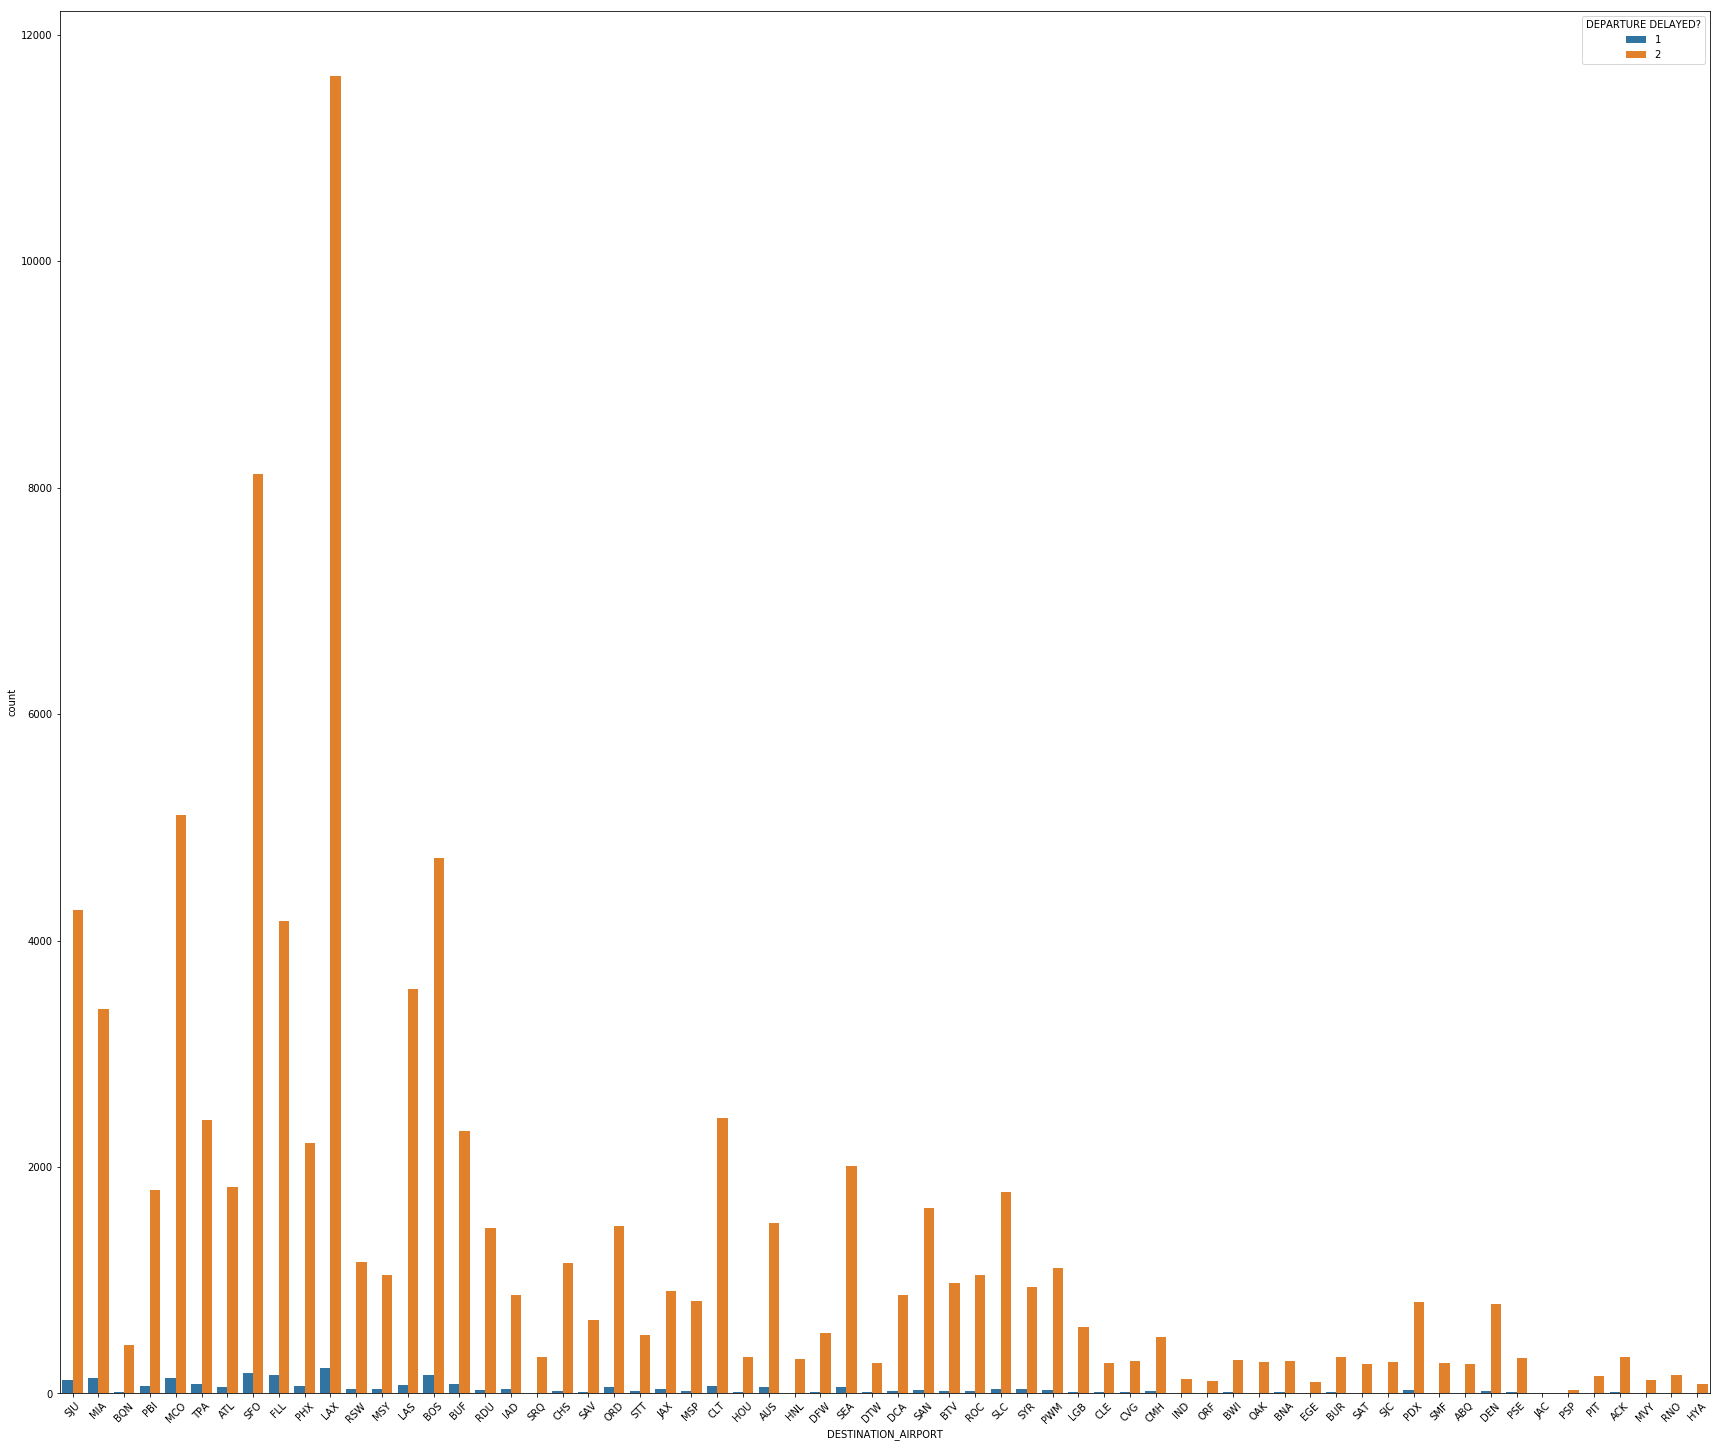

In [82]:
plt.figure(figsize=(24, 20))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0,0])

ax1 = sns.countplot(x=FINAL_SET['DESTINATION_AIRPORT'], hue="DEPARTURE DELAYED?", data=FINAL_SET)
ax1 = plt.tight_layout()
ax1 = plt.xticks(rotation=45)